#              CREDIT CARD ANALYSIS - CLASSIFICATION : MODEL BUILDING AND MACHINE LEARNING

###            NAME : Kanmani A

###            DATE: 04.07.2025

##              OVERVIEW OF PROBLEM STATMENT

Generally Credit card have financial risks which potentially result in loss and affect portfolio stability.In some caese , Credit card                 holders may overuse the cards transaction and if they fail to pay the default due of the card , then that affects the banks income or                  stability .In order to avoid all these scenarios , a prediction is made by default based on history of transaction and other                           environmental factors involved.

The primary challenge is to accurately predict whether a credit card client will default on their payment in the next month based on                   their demographic details, financial history, and repayment behavior. Early identification of clients at high risk of default can help                 financial institutions take proactive measures to mitigate losses, such as adjusting credit limits, offering restructuring plans, or                   rejecting high-risk applications.

## Objectives

To develop a predictive model that estimates the likelihood of credit card default among clients based on demographic and financial attributes.
The goal is to identify key risk factors influencing default behavior, improve credit risk.Also to Predicts whether a client is likely to default on their credit card payment.To provides actionable insights to optimize credit approval strategies and reduce financial load.

### Data Description

**Source**: From UCI ML Repository, **link**: https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

### Features:

- ID: Id of the users
- LIMIT_BAL: Amount of given credit.
- SEX: Sex of the customer.(1= Male, 2= Female)
- EDUCATION: Education level of customers (1 = UG; 2 = PG; 3 = HIGH_SCHOOL; 4 = OTHERS)
- MARRIAGE: Marital status (1 = married; 2 = single; 3 = others)
- AGE: Age of the customer.nth'
- PAY_0: Pay status of september.
- PAY_2: Pay status of August.
- PAY_3: Pay status of July.
- PAY_4: Pay Status of June.
- PAY_5: Pay status of May.
- PAY_6: Pay status of April.

 PAY_0 to PAY_6 contains values of -2 to 9 describes the status of repayment

- -2 = no payment
- -1 = pay duly
- 1 = payment delay for one month
- 2 = payment delay for two months
- 8 = payment delay for eight months
- 9 = payment delay for nine months and above

- BILL_AMT1: Bill Amount of September.
- BILL_AMT2: Bill Amount of August.
- BILL_AMT3: Bill Amount of July.
- BILL_AMT4: Bill Amount of June
- BILL_AMT5: Bill Amount of May.
- BILL_AMT6: Bill Amount of April.
- PAY_AMT1: Payed Amount in September
- PAY_AMT2: Payed Amount in August.
- PAY_AMT3: Payed Amount in July.
- PAY_AMT4: Payed Amount in June.
- PAY_AMT5: Payed Amount in May.
- PAY_AMT6: Payed Amount in April.

- default payment next month: User defaulted the payment or not (1=Yes, 0=No). Target Variable

## Importing library files

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer,LabelEncoder,OneHotEncoder,StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest ,f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, precision_score,f1_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib

### Data Collection

#### Loading Data

In [139]:
data =pd.read_csv('project_excel.csv')

In [140]:
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


#### Converting to Dataframe

In [141]:
df=pd.DataFrame(data)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [142]:
df.head(10) #pass first 10 values

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [143]:
df.tail(10) # details of last 10 rows

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29990,29991,140000,1,2,1,41,0,0,0,0,...,138262,49675,46121,6000,7000,4228,1505,2000,2000,0
29991,29992,210000,1,2,1,34,3,2,2,2,...,2500,2500,2500,0,0,0,0,0,0,1
29992,29993,10000,1,3,1,43,0,0,0,-2,...,0,0,0,2000,0,0,0,0,0,0
29993,29994,100000,1,1,2,38,0,-1,-1,0,...,70626,69473,55004,2000,111784,4000,3000,2000,2000,0
29994,29995,80000,1,2,2,34,2,2,2,2,...,77519,82607,81158,7000,3500,0,7000,0,4000,1
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


#### Checking the shape of the DataFrame

In [144]:
df.shape

(30000, 25)

#### Displaying Columns 

In [145]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

#### Displaying Information

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Describing the details of the dataset

In [147]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


#### Checking Datatypes

In [148]:
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [149]:
print(df['default payment next month'].dtype)

int64


### Data Cleaning and Preprocessing 

#### Checking for Duplicates

In [150]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool

In [151]:
df.duplicated().sum()

np.int64(0)

**No duplicate values found in the Dataset**

#### Finding and Handling null values

In [152]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

**No Null values found in the dataset**

In [153]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

#### Renaming Column names

In [154]:
df=df.rename(columns={'PAY_0':'SEPT_PAY',
                      'PAY_2':'AUG_PAY',
                      'PAY_3':'JULY_PAY',
                      'PAY_4':'JUN_PAY',
                      'PAY_5':'MAY_PAY',
                      'PAY_6':'APR_PAY'})

In [155]:
df=df.rename(columns={'BILL_AMT1':'SEPT_BILL',
                      'BILL_AMT2':'AUG_BILL',
                      'BILL_AMT3':'JULY_BILL',
                      'BILL_AMT4':'JUN_BILL',
                      'BILL_AMT5':'MAY_BILL',
                      'BILL_AMT6':'APR_BILL'})

In [156]:
df=df.rename(columns={'PAY_AMT1':'SEPT_PAYMENT',
                      'PAY_AMT2':'AUG_PAYMENT',
                      'PAY_AMT3':'JULY_PAYMENT',
                      'PAY_AMT4':'JUN_PAYMENT',
                      'PAY_AMT5':'MAY_PAYMENT',
                      'PAY_AMT6':'APR_PAYMENT'})

In [157]:
df=df.rename(columns={'default payment next month':'Target'})

**Checking the Renamed columns**

In [158]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,SEPT_PAY,AUG_PAY,JULY_PAY,JUN_PAY,...,JUN_BILL,MAY_BILL,APR_BILL,SEPT_PAYMENT,AUG_PAYMENT,JULY_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,Target
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [159]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'SEPT_PAY',
       'AUG_PAY', 'JULY_PAY', 'JUN_PAY', 'MAY_PAY', 'APR_PAY', 'SEPT_BILL',
       'AUG_BILL', 'JULY_BILL', 'JUN_BILL', 'MAY_BILL', 'APR_BILL',
       'SEPT_PAYMENT', 'AUG_PAYMENT', 'JULY_PAYMENT', 'JUN_PAYMENT',
       'MAY_PAYMENT', 'APR_PAYMENT', 'Target'],
      dtype='object')

#### Replacing some numerical values with actual labels

In [160]:
df.replace({'SEX':{1:'M',2:'F'}},inplace=True)

In [161]:
df.replace({'MARRIAGE':{0:'OTHERS',1:'Married',2:'Single',3:'Others'}},inplace=True)

In [162]:
df.replace({'EDUCATION':{1:'UG',2:'PG',3:'HIGH_SCHOOL',4:'OTHERS'}},inplace=True)

In [163]:
df.replace({'Target':{1:'Yes',0:'No'}},inplace=True)

**Checking the replaced values**

In [164]:
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,SEPT_PAY,AUG_PAY,JULY_PAY,JUN_PAY,...,JUN_BILL,MAY_BILL,APR_BILL,SEPT_PAYMENT,AUG_PAYMENT,JULY_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,Target
0,1,20000,F,PG,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Yes
1,2,120000,F,PG,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
2,3,90000,F,PG,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
3,4,50000,F,PG,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
4,5,50000,M,PG,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,No
5,6,50000,M,UG,Single,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,No
6,7,500000,M,UG,Single,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,No
7,8,100000,F,PG,Single,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,No
8,9,140000,F,HIGH_SCHOOL,Married,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,No
9,10,20000,M,HIGH_SCHOOL,Single,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,No


**Counting y variable**

In [165]:
target_value=df['Target'].value_counts()

In [166]:
target_value

Target
No     23364
Yes     6636
Name: count, dtype: int64

**Finding unique values in a particular column**

In [167]:
df['EDUCATION'].unique()

array(['PG', 'UG', 'HIGH_SCHOOL', 5, 'OTHERS', 6, 0], dtype=object)

**Filtering the values of a column**

In [168]:
filtered_df=df[df['SEX']=='M']

In [169]:
filtered_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,SEPT_PAY,AUG_PAY,JULY_PAY,JUN_PAY,...,JUN_BILL,MAY_BILL,APR_BILL,SEPT_PAYMENT,AUG_PAYMENT,JULY_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,Target
4,5,50000,M,PG,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,No
5,6,50000,M,UG,Single,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,No
6,7,500000,M,UG,Single,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,No
9,10,20000,M,HIGH_SCHOOL,Single,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,No
13,14,70000,M,PG,Single,30,1,2,2,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,M,HIGH_SCHOOL,Married,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,No
29996,29997,150000,M,HIGH_SCHOOL,Single,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,No
29997,29998,30000,M,PG,Single,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,Yes
29998,29999,80000,M,HIGH_SCHOOL,Married,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,Yes


#### Sorting

In [170]:
sort_s=df.sort_values(by='AGE')

In [171]:
sort_s

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,SEPT_PAY,AUG_PAY,JULY_PAY,JUN_PAY,...,JUN_BILL,MAY_BILL,APR_BILL,SEPT_PAYMENT,AUG_PAYMENT,JULY_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,Target
7141,7142,30000,F,PG,Single,21,-2,-2,-2,-2,...,4311,1551,0,780,3260,4311,1551,0,0,No
27662,27663,20000,F,PG,Single,21,-1,-1,2,2,...,0,0,0,780,0,0,0,0,0,No
8490,8491,10000,M,HIGH_SCHOOL,Single,21,0,0,2,0,...,6154,6280,0,2400,0,0,126,0,0,No
12556,12557,20000,F,PG,Married,21,1,-2,-1,-1,...,0,0,0,0,289,0,0,0,0,Yes
1471,1472,20000,M,PG,Single,21,0,0,2,0,...,20000,0,0,5000,0,0,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29175,29176,160000,F,HIGH_SCHOOL,Married,74,0,0,0,-1,...,16905,0,19789,3783,2268,16905,0,19789,26442,No
246,247,250000,F,PG,Married,75,0,-1,-1,-1,...,1010,5572,794,1631,1536,1010,5572,794,1184,No
25141,25142,210000,M,PG,Married,75,0,0,0,0,...,203776,205901,210006,9700,8810,9000,7300,7500,7600,No
25136,25137,180000,M,UG,Married,75,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,Yes


**Grouping and finding the mean value**

In [172]:
grouped_df=df.groupby('MARRIAGE')['LIMIT_BAL'].mean()

In [173]:
grouped_df

MARRIAGE
Married    182200.893184
OTHERS     132962.962963
Others      98080.495356
Single     156413.660737
Name: LIMIT_BAL, dtype: float64

In [174]:
g=df.groupby('SEX')['LIMIT_BAL'].count()

In [175]:
g

SEX
F    18112
M    11888
Name: LIMIT_BAL, dtype: int64

### Statistical Analysis

In [176]:
mean_limitbal=df['LIMIT_BAL'].mean()
mean_limitbal

np.float64(167484.32266666667)

In [177]:
median_limitbal=df['LIMIT_BAL'].median()
median_limitbal

np.float64(140000.0)

In [178]:
std_limitbal=df['LIMIT_BAL'].std()
std_limitbal

np.float64(129747.66156720239)

### Dataset is imbalanced and EDA is required

## EDA - Exploratory Data Analysis (EDA)

## Performing KDE Plots

In [179]:
#creating list of columns having continues numbers
continues_numerical_col =  [
    'LIMIT_BAL', 'SEPT_BILL', 'SEPT_BILL', 'JULY_BILL', 
    'JUN_BILL', 'MAY_BILL', 'APR_BILL', 'SEPT_PAYMENT', 'AUG_PAYMENT', 
    'JULY_PAYMENT', 'JUN_PAYMENT', 'MAY_PAYMENT', 'APR_PAYMENT'
]

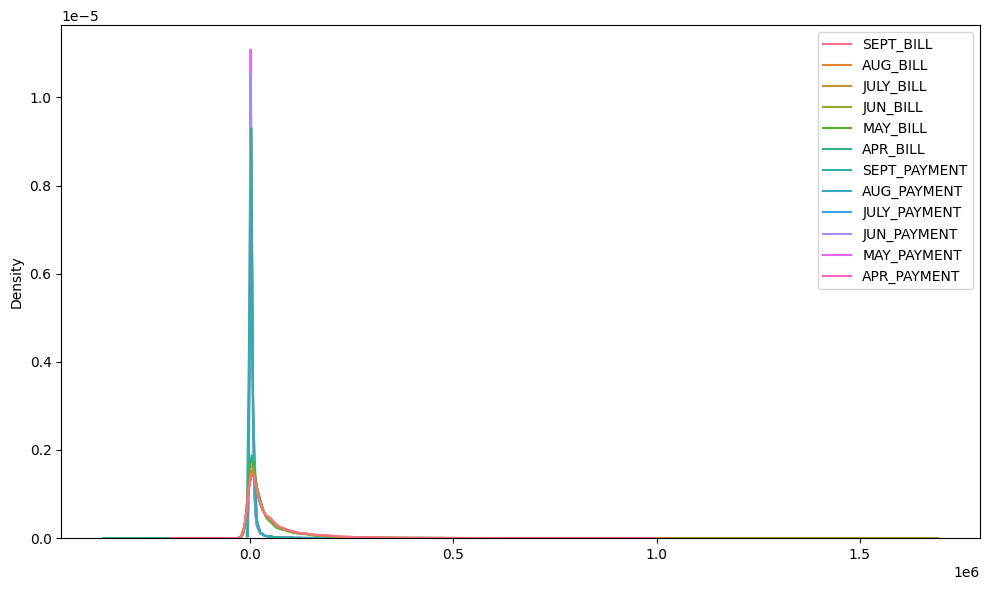

In [180]:
plt.figure(figsize=(10,6))
sns.kdeplot(df.drop(['AGE','ID','LIMIT_BAL','SEPT_PAY','AUG_PAY','JULY_PAY','JUN_PAY','MAY_PAY','APR_PAY'],axis=1))
plt.tight_layout()
plt.show()

In [181]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'SEPT_PAY',
       'AUG_PAY', 'JULY_PAY', 'JUN_PAY', 'MAY_PAY', 'APR_PAY', 'SEPT_BILL',
       'AUG_BILL', 'JULY_BILL', 'JUN_BILL', 'MAY_BILL', 'APR_BILL',
       'SEPT_PAYMENT', 'AUG_PAYMENT', 'JULY_PAYMENT', 'JUN_PAYMENT',
       'MAY_PAYMENT', 'APR_PAYMENT', 'Target'],
      dtype='object')

**Count Plot for status of repayment**

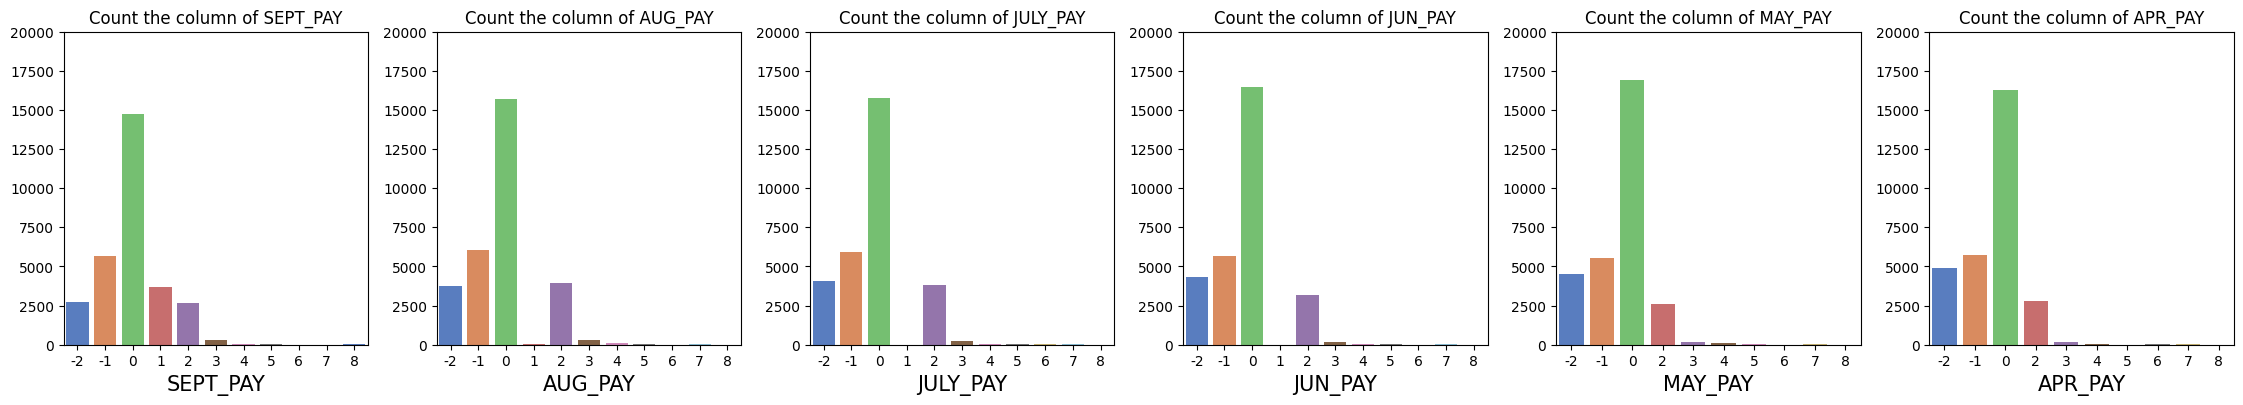

In [182]:
# List of columns to plot
payments = [ 'SEPT_PAY', 'AUG_PAY', 'JULY_PAY', 'JUN_PAY', 'MAY_PAY', 'APR_PAY']
# Set the figure size
plt.figure(figsize=(30, 15))
# for loop for each PAY column and create a counting plot
for i, column in enumerate(payments):
    plt.subplot(4, 8, i + 1)  # Create a grid of subplots
    sns.countplot(x=df[column], palette="muted")
    plt.ylim(0,20000)
    plt.xlabel(column,fontsize=15)
    plt.ylabel('')
    plt.title(f"Count the column of {column}")
plt.tight_layout()  
plt.show()

**In Above Figure -1 = Fully paid 1- 9 means delayed for 1-9 respectevely -2 = no payment 0 = no due**

In [183]:
gender = df['SEX'].value_counts()
print("gender counting:")
print(gender)

gender counting:
SEX
F    18112
M    11888
Name: count, dtype: int64


#### Depend variable - ' target '

In [184]:
#Value counts
df['Target'].value_counts()

Target
No     23364
Yes     6636
Name: count, dtype: int64

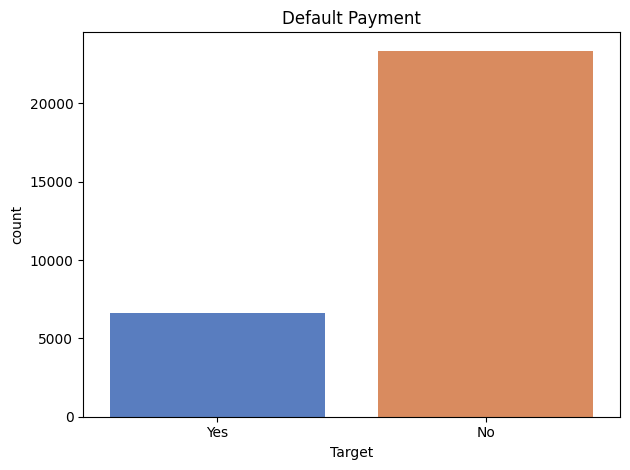

In [185]:
sns.countplot(x ='Target', data = df, palette='muted')
plt.title('Default Payment')
plt.tight_layout()  
plt.show()

#### Independend Variables - Sex , Marriage , Age , Education

##### SEX

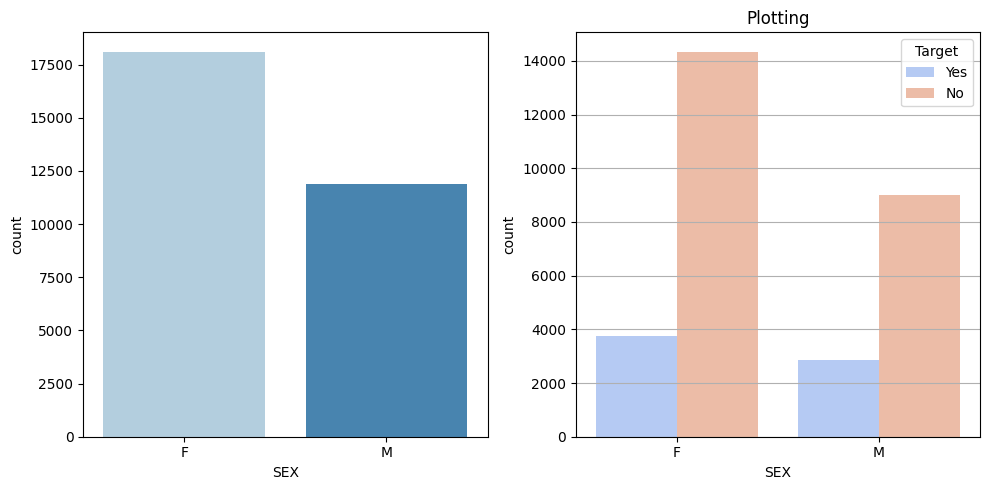

In [186]:
#count plot for Sex with respect to Target
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
plt.title('Plotting')
sns.countplot(x = 'SEX', ax = axes[0], data = df, palette = 'Blues')
sns.countplot(x = 'SEX', hue = 'Target',ax = axes[1], data = df, palette ='coolwarm')
# Grid lines only for y-axis
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### Marriage

In [187]:
#Value counts for marriage
df['MARRIAGE'].value_counts()

MARRIAGE
Single     15964
Married    13659
Others       323
OTHERS        54
Name: count, dtype: int64

<Axes: title={'center': 'Plotting'}, xlabel='MARRIAGE', ylabel='count'>

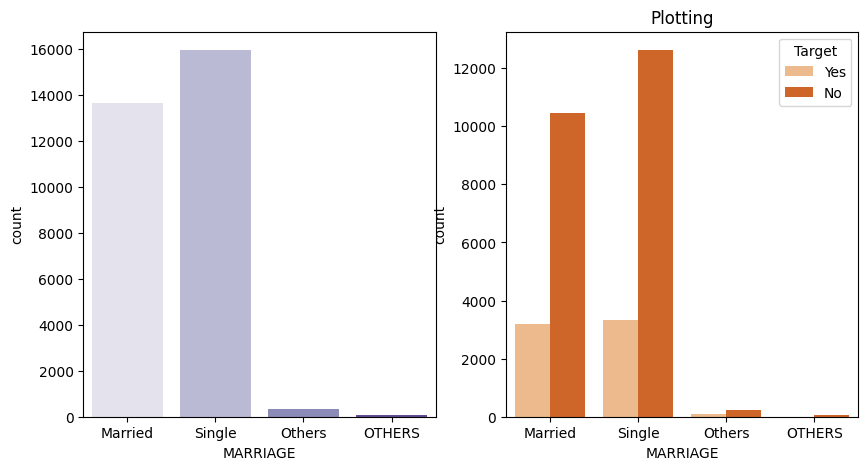

In [188]:
#count plot for MARRIAGE for Target 
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
plt.title('Plotting')
sns.countplot(x = 'MARRIAGE', ax = axes[0], data = df, palette = 'Purples')
sns.countplot(x = 'MARRIAGE', hue = 'Target',ax = axes[1], data = df, palette = 'Oranges')

##### EDUCATION

In [189]:
#Value counts of education
df['EDUCATION'].value_counts()

EDUCATION
PG             14030
UG             10585
HIGH_SCHOOL     4917
5                280
OTHERS           123
6                 51
0                 14
Name: count, dtype: int64

<Axes: title={'center': 'Plotting'}, xlabel='EDUCATION', ylabel='count'>

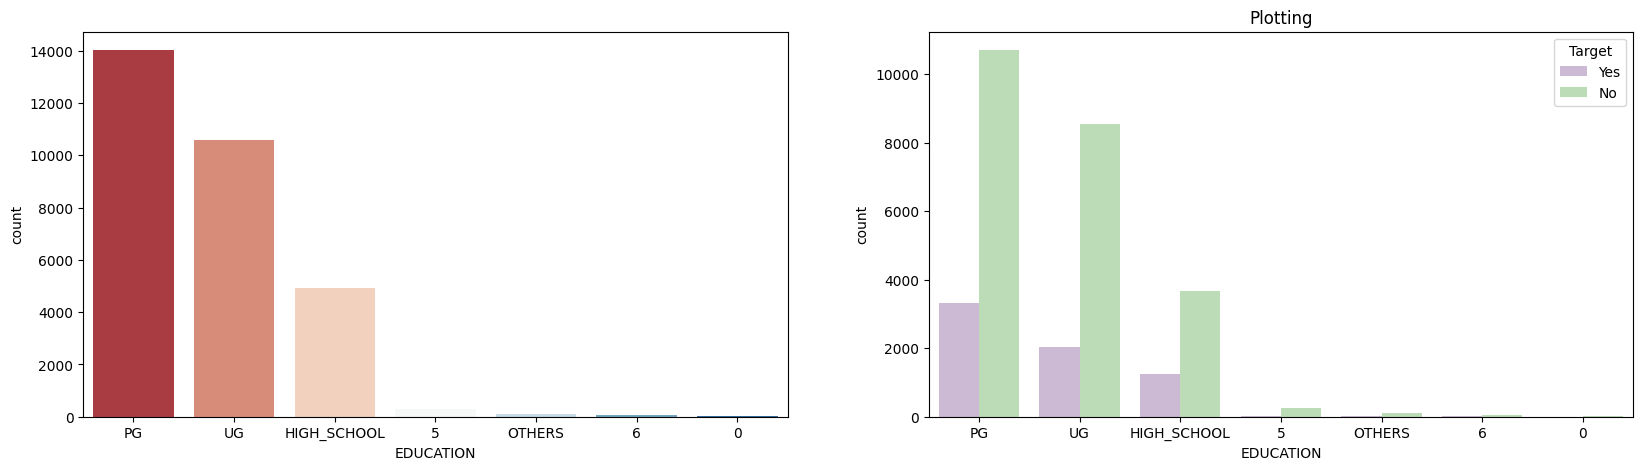

In [190]:
#count plot for education with Target
fig, axes = plt.subplots(ncols=2,figsize=(20,5))
plt.title('Plotting')
sns.countplot(x = 'EDUCATION', ax = axes[0], data = df, palette = 'RdBu')
sns.countplot(x = 'EDUCATION', hue = 'Target',ax = axes[1], data = df, palette = 'PRGn')

##### AGE

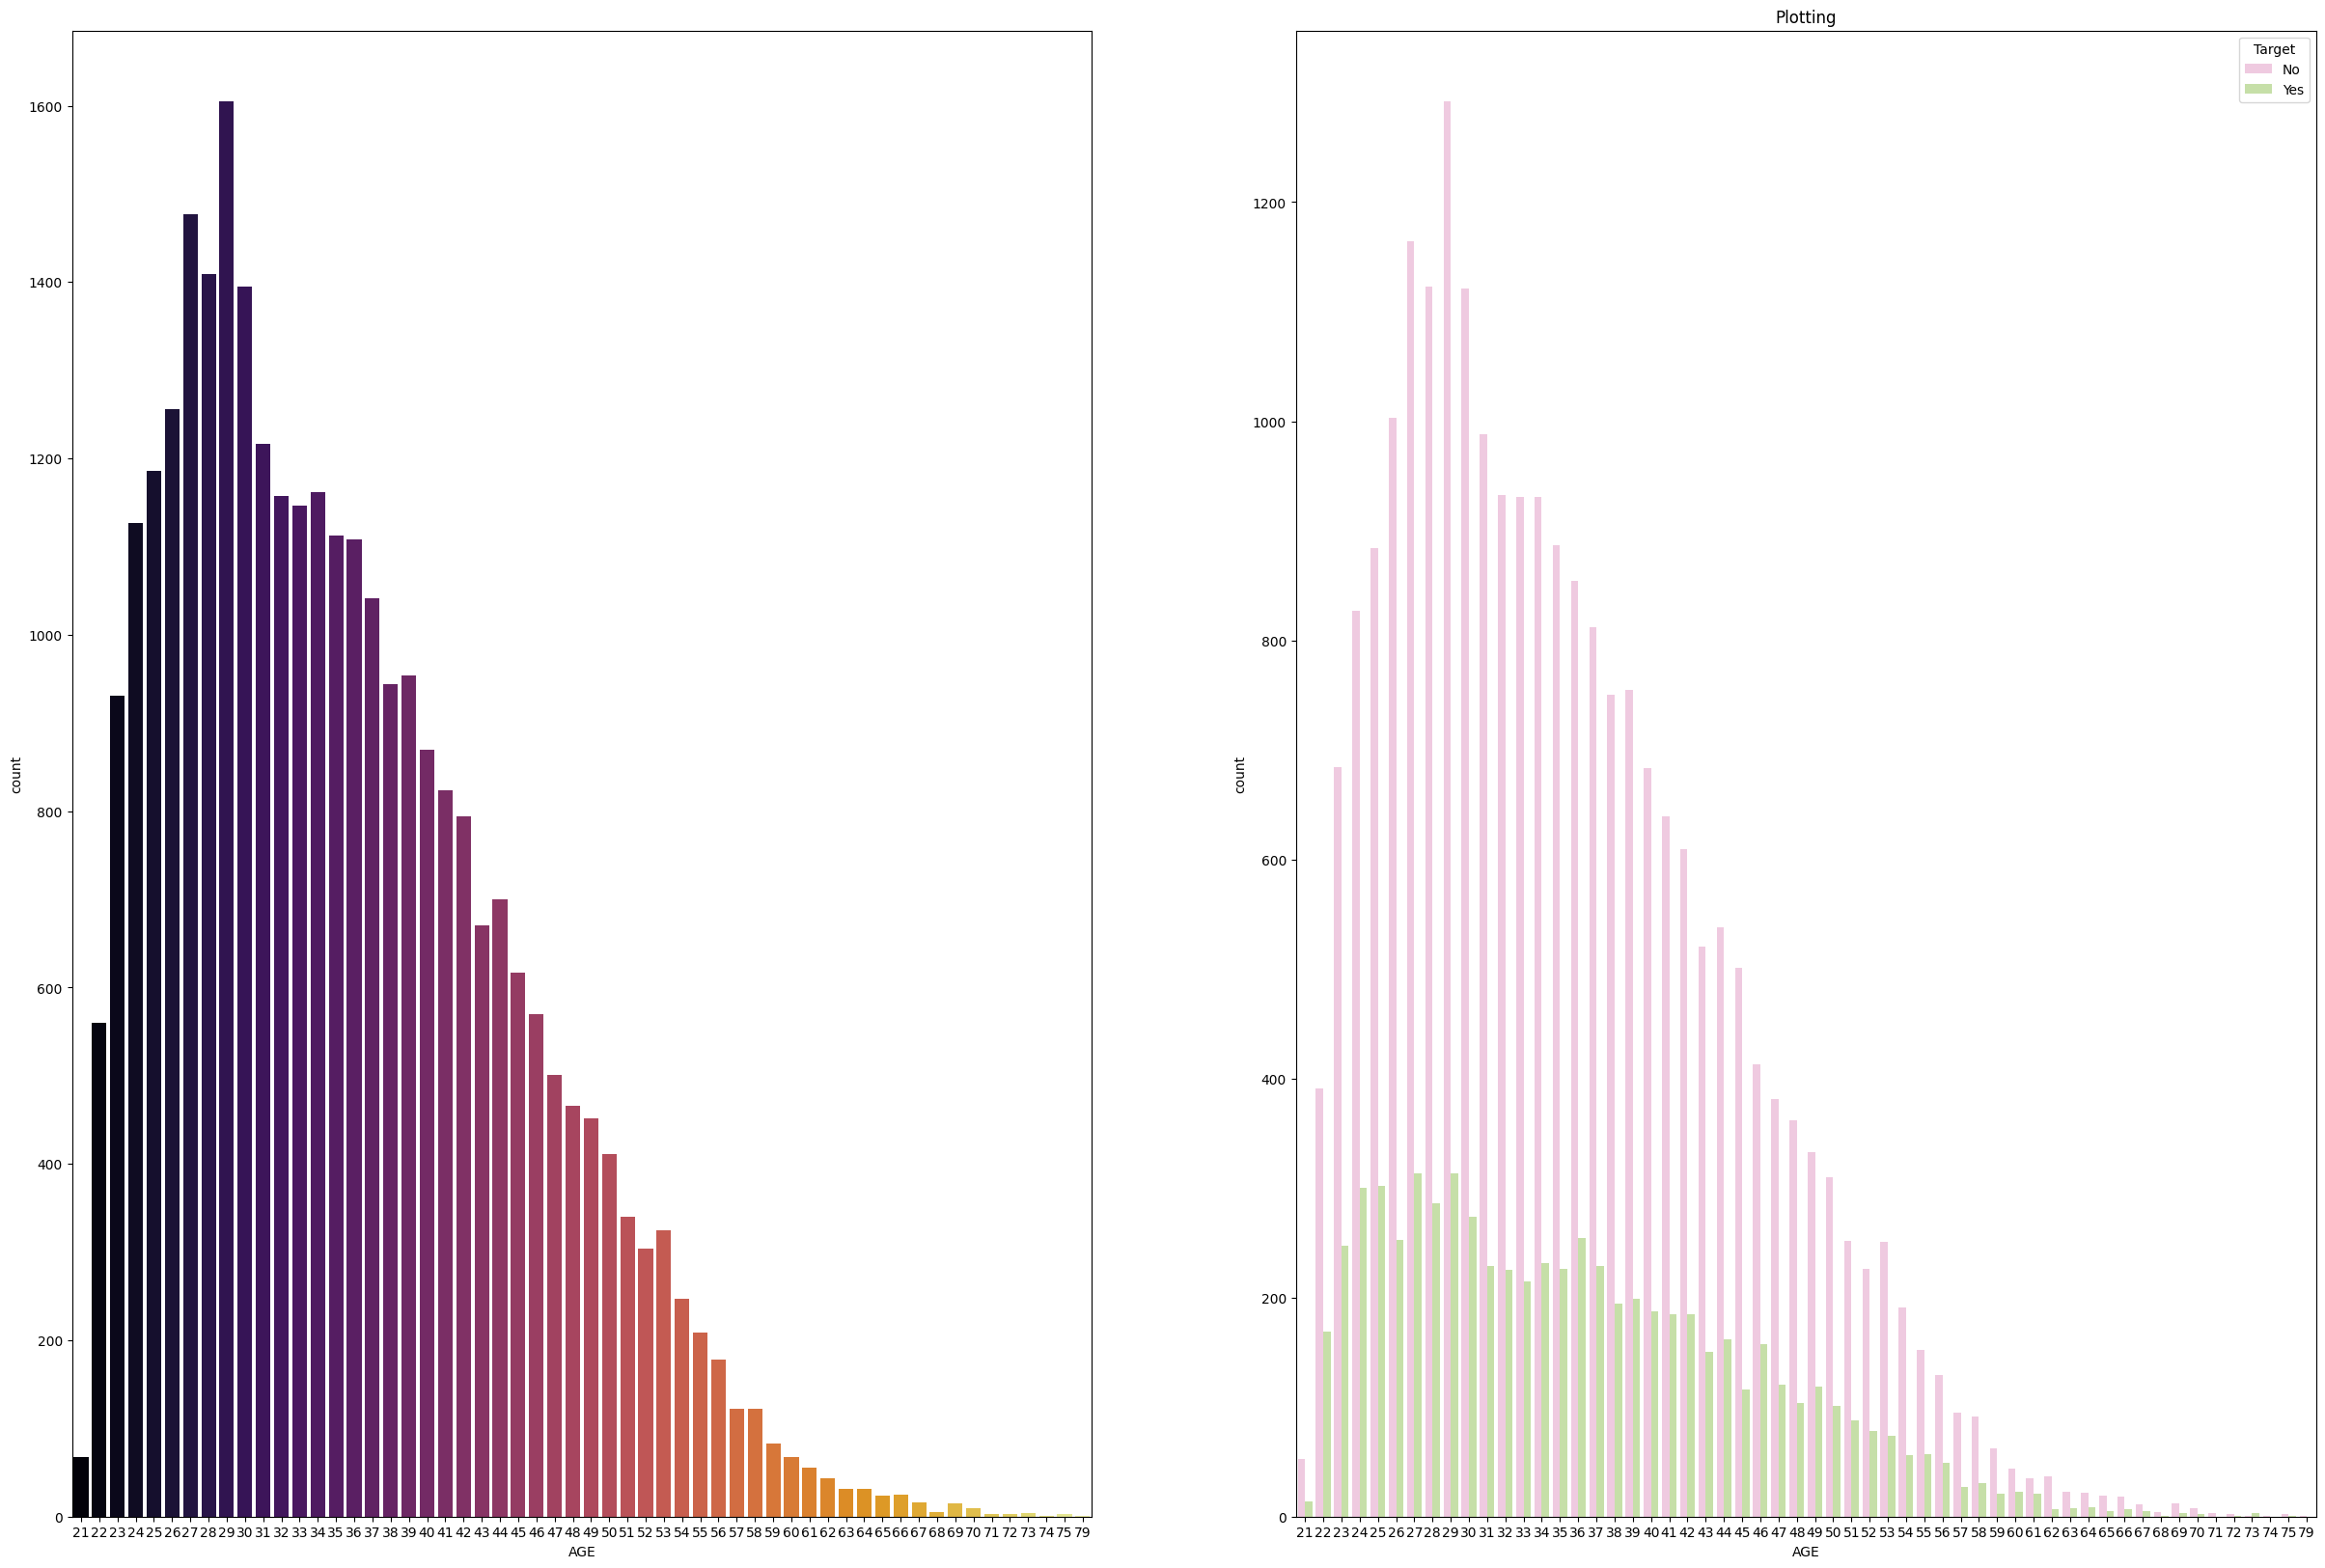

In [191]:
#Count plot for age with respect to Target
fig, axes = plt.subplots(ncols=2,figsize=(30,20))
plt.title('Plotting')
sns.countplot(x = 'AGE',ax = axes[0], data = df, palette = 'inferno')
sns.countplot(x = 'AGE', hue = 'Target', data = df,ax = axes[1], palette = 'PiYG')
plt.show()

##### Plotting bill with pay amount with respect to Marriage Status

In [192]:
# List of BILL and PAY columns
bill_cols = ['SEPT_BILL', 'AUG_BILL', 'JULY_BILL','JUN_BILL', 'MAY_BILL', 'APR_BILL']
pay_cols = ['SEPT_PAYMENT', 'AUG_PAYMENT', 'JULY_PAYMENT', 'JUN_PAYMENT', 'MAY_PAYMENT', 'APR_PAYMENT']

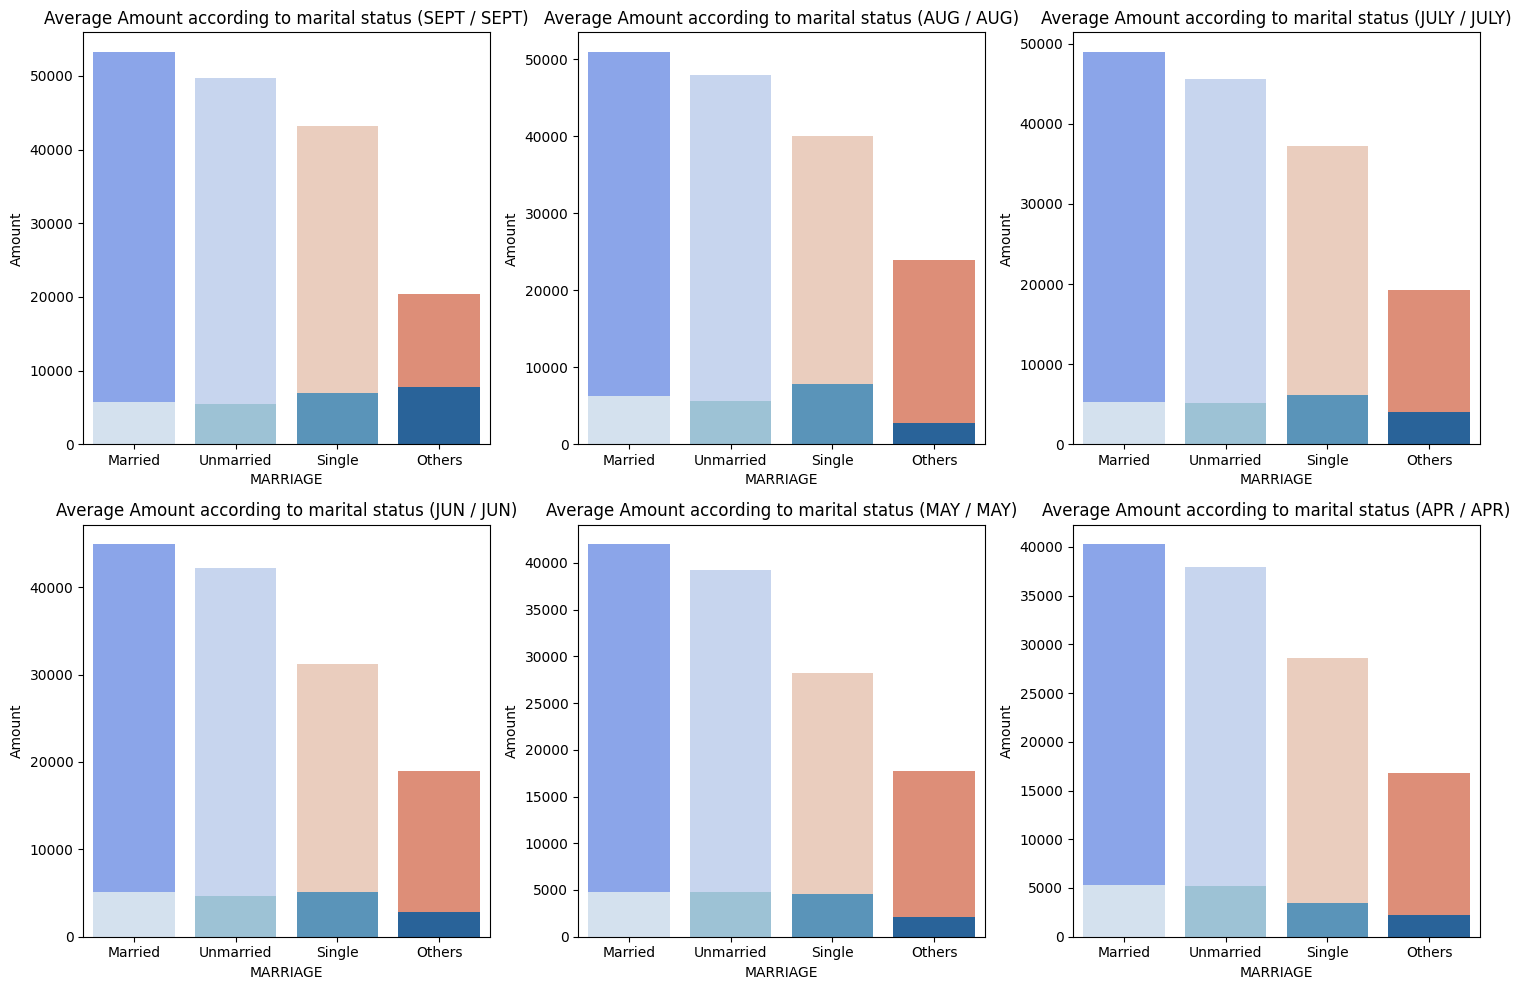

In [193]:
plt.figure(figsize=(15, 10))

for i, (bill_col, pay_col) in enumerate(zip(bill_cols, pay_cols)):
    plt.subplot(2, 3, i + 1)

    # Plot average bill amount for each gender
    sns.barplot(x='MARRIAGE', y=bill_col, data=df, palette='coolwarm', ci=None)
    
    # Plot average payment amount for each gender
    sns.barplot(x='MARRIAGE', y=pay_col, data=df, palette='Blues', ci=None)

    plt.title(f'Average Amount according to marital status ({bill_col.split("_")[0]} / {pay_col.split("_")[0]})')
    plt.xticks([0, 1 ,2,3], ['Married', 'Unmarried','Single','Others'])
    plt.ylabel('Amount')

plt.tight_layout()
plt.show()

##### Plotting bill and payment amount with respect to gender

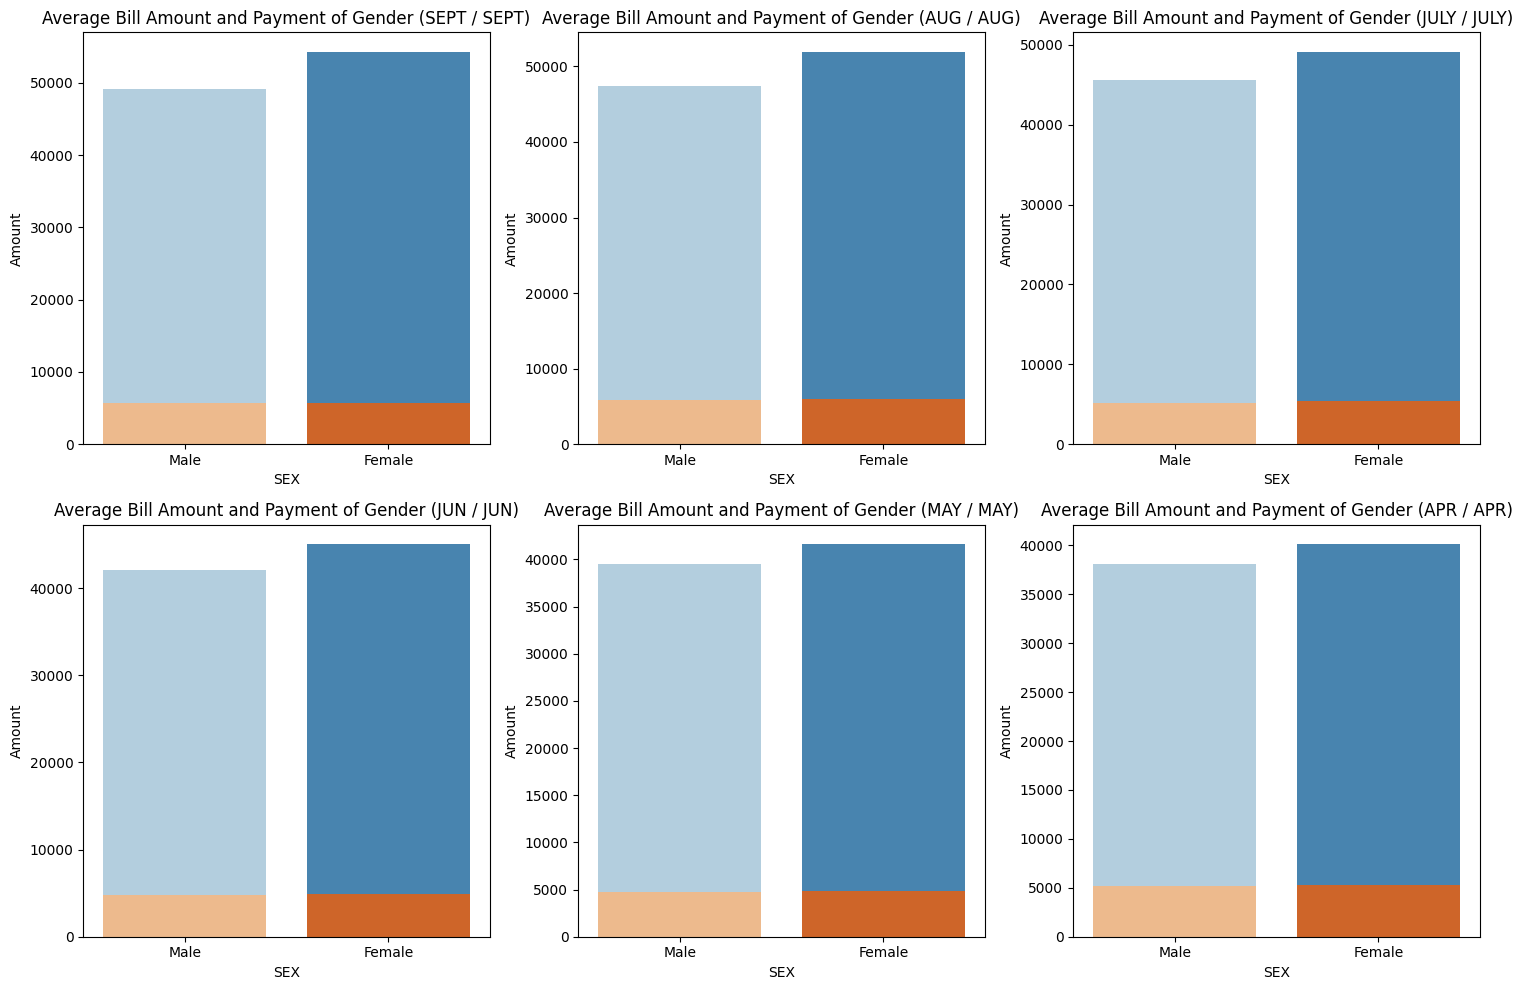

In [194]:
plt.figure(figsize=(15, 10))
for i, (bill_column, pay_column) in enumerate(zip(bill_cols, pay_cols)):
    plt.subplot(2, 3, i + 1)

    # Plot average bill amount for each gender
    sns.barplot(x='SEX', y=bill_column, data=df, palette='Blues', ci=None)
     # Plot average payment amount for each gender
    sns.barplot(x='SEX', y=pay_column, data=df, palette='Oranges', ci=None)

    plt.title(f'Average Bill Amount and Payment of Gender ({bill_column.split("_")[0]} / {pay_column.split("_")[0]})')
    plt.xticks([0, 1], ['Male', 'Female'])
    plt.ylabel('Amount')

plt.tight_layout()
plt.show()

##### Pie chart for bill amount and payment amount

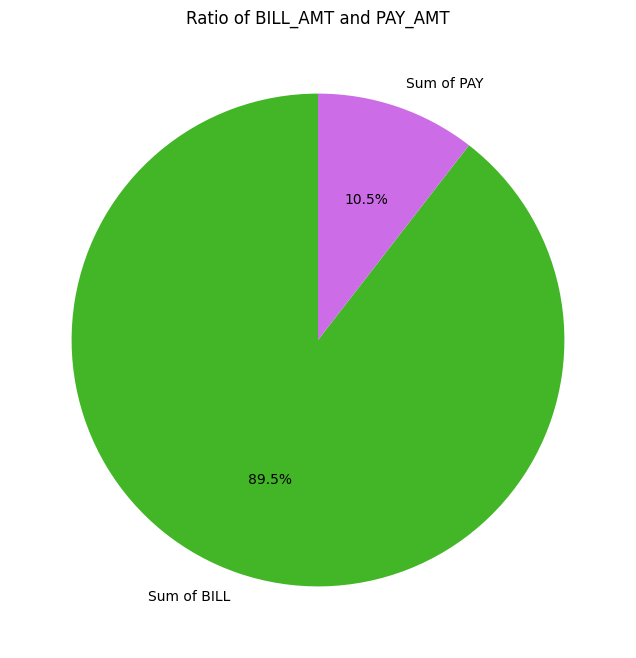

In [195]:
# Calculate the sum of all BILL_AMT and PAY_AMT columns
bill_amt = df[bill_cols].sum().sum()  # Sum of all BILL_AMT columns
pay_amt = df[pay_cols].sum().sum()  # Sum of all PAY_AMT columns
# Create a pie chart to show the proportion of each sum
labels = ['Sum of BILL', 'Sum of PAY']
sizes = [bill_amt, pay_amt]
colors = ['#42B626', '#CC6CE7']
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Ratio of BILL_AMT and PAY_AMT")
plt.show()

**Pie chart to show the payment in each month**

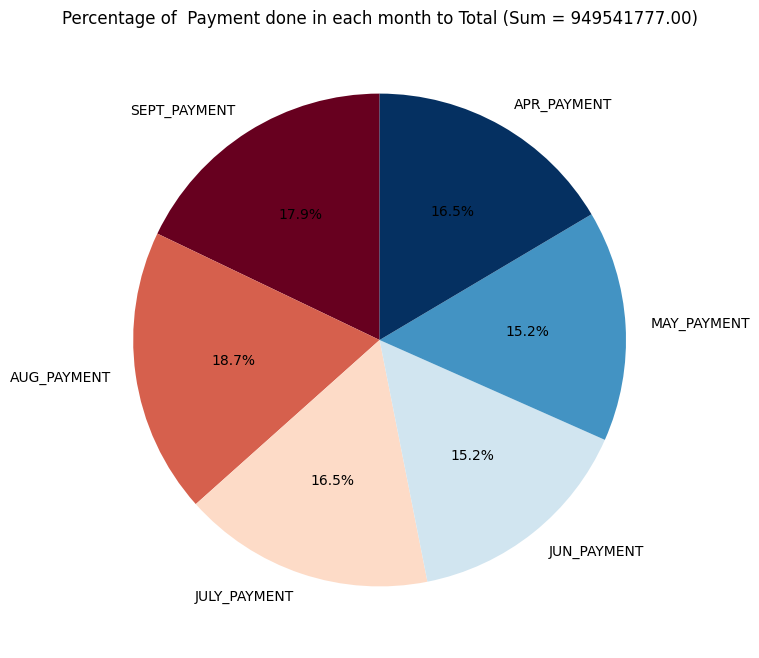

In [196]:
# Calculate the sum of each BILL_AMT column
pay_amt_sums = df[pay_cols].sum()
# Calculate the total sum of all BILL_AMT columns
total_pay_amt = pay_amt_sums.sum()
# Create a color map 
colors = plt.cm.RdBu(np.linspace(0, 1, len(pay_amt_sums)))
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(pay_amt_sums, labels=pay_amt_sums.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title(f"Percentage of  Payment done in each month to Total (Sum = {total_pay_amt:.2f})")
plt.show()

##### Pie chart to show the bill amount for every month

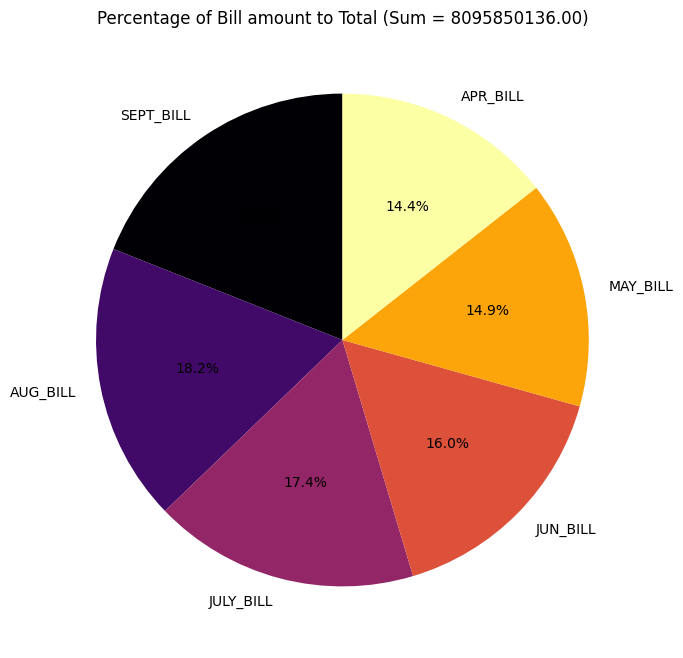

In [197]:
# Calculate the sum of each BILL_AMT
bill_amt_sums = df[bill_cols].sum()
# Calculate the total sum of all BILL_AMT
total_bill_amt = bill_amt_sums.sum()
# Create a color map using the 'inferno' colormap
colors = plt.cm.inferno(np.linspace(0, 1, len(bill_amt_sums)))
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(bill_amt_sums, labels=bill_amt_sums.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title(f"Percentage of Bill amount to Total (Sum = {total_bill_amt:.2f})")
plt.show()

#### Removing Outliers

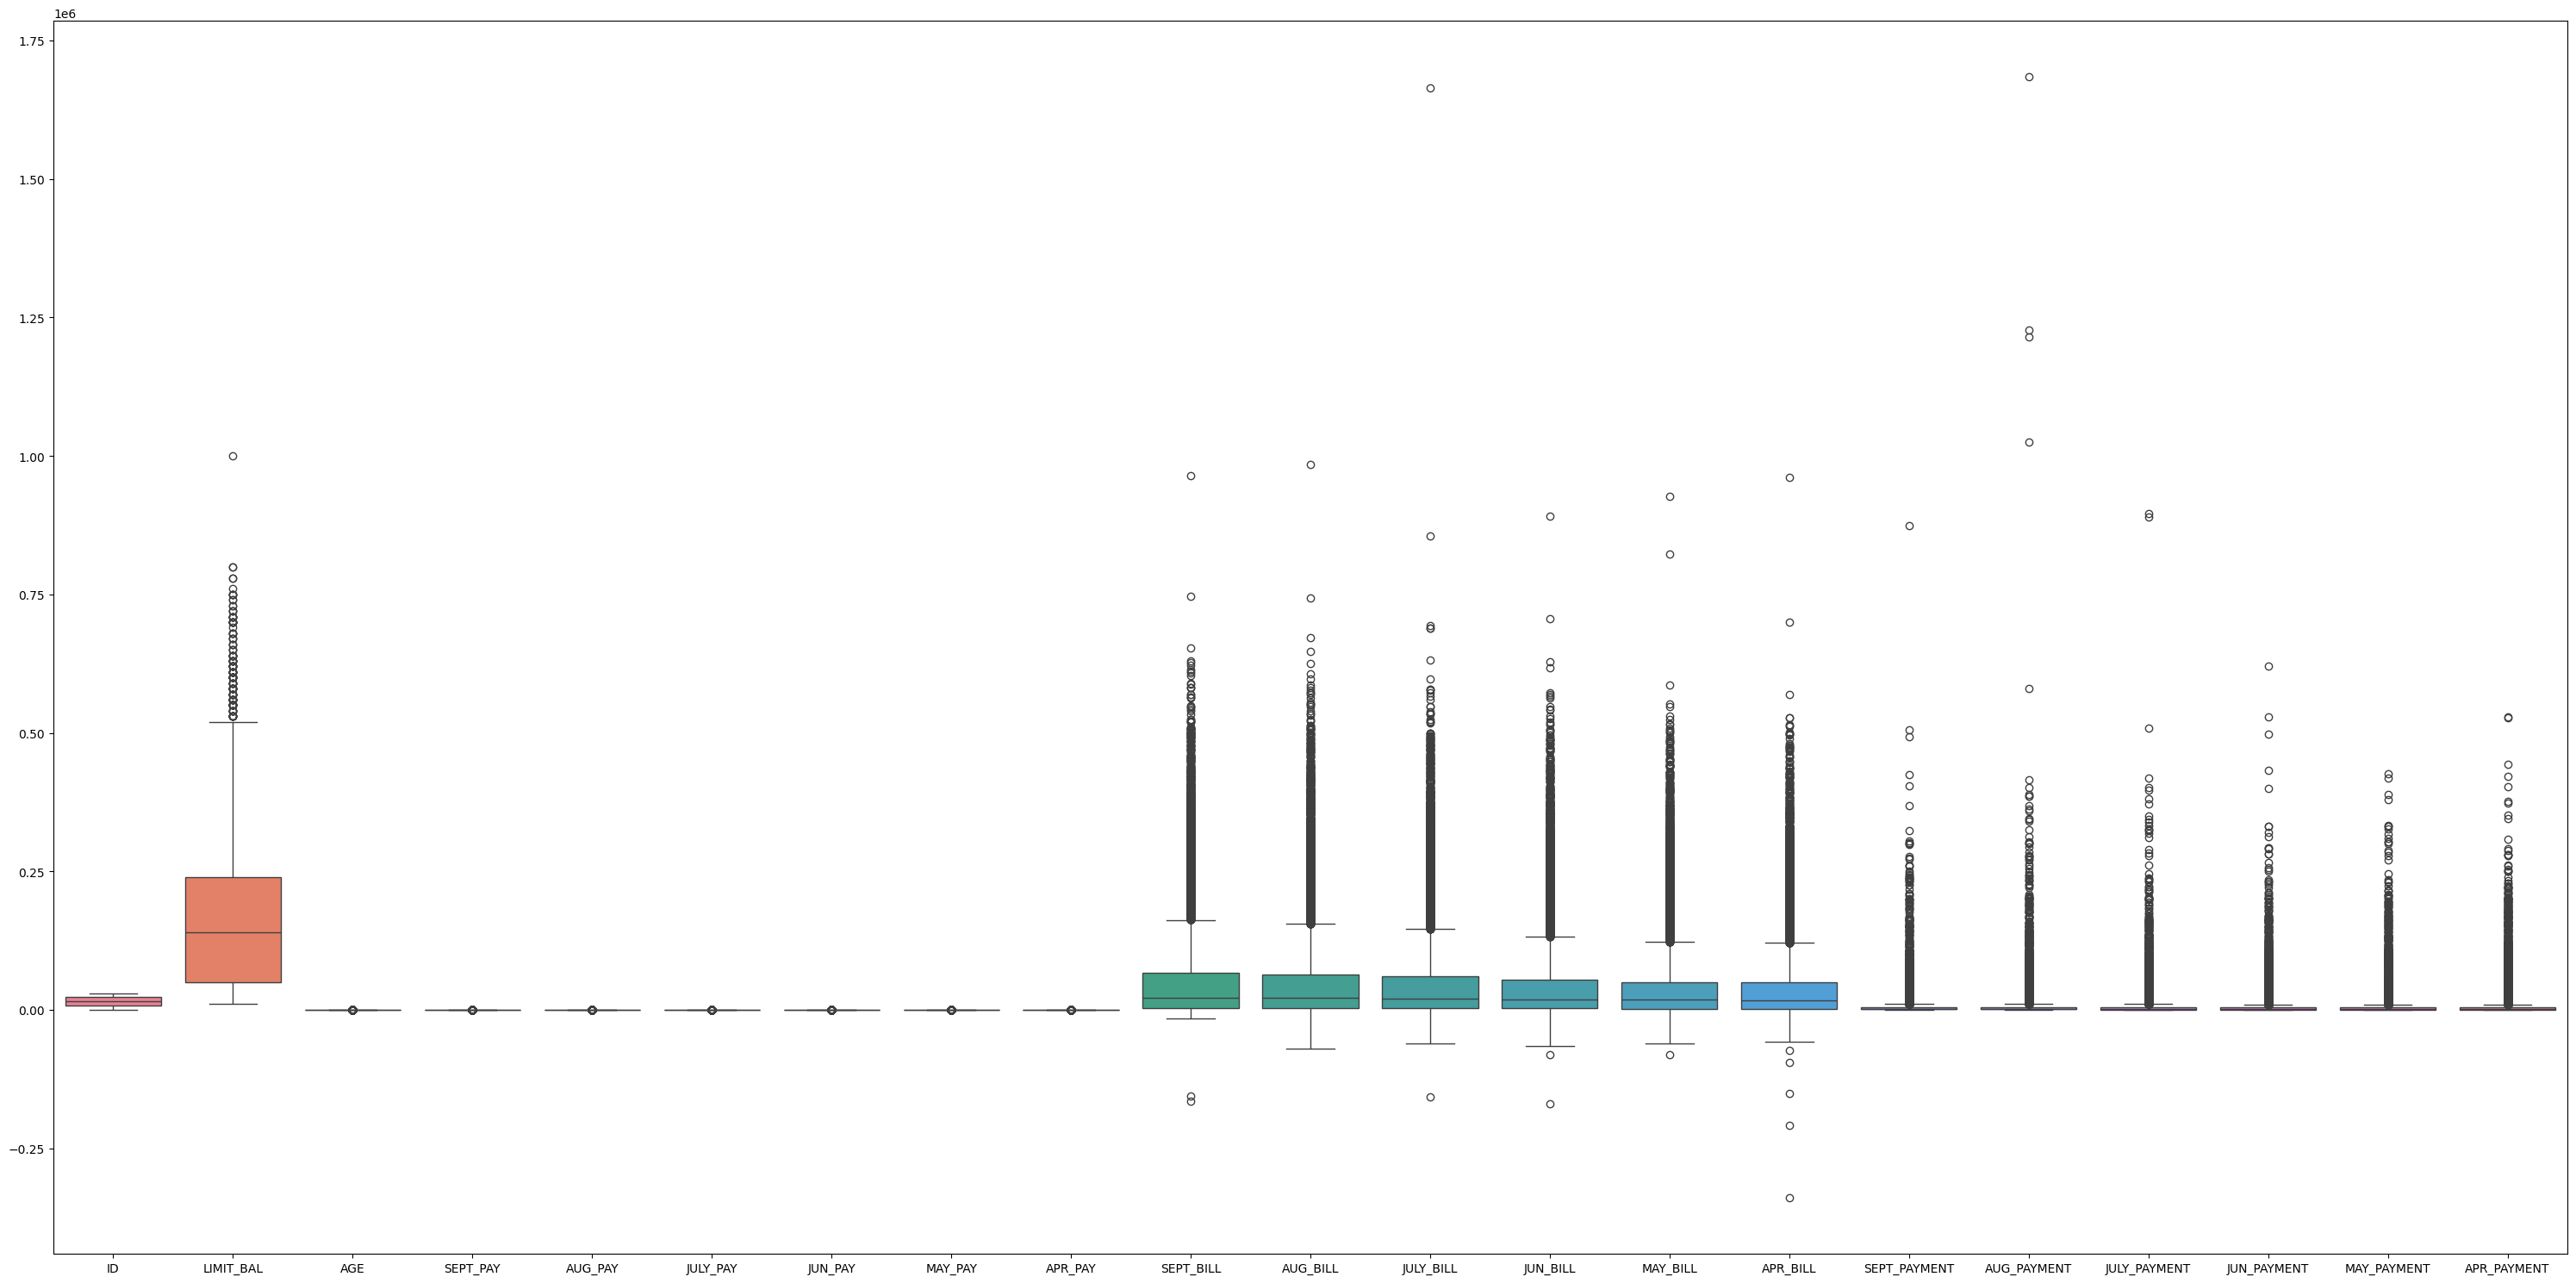

In [198]:
plt.figure(figsize=(30,15))
sns.boxplot(data=df)
plt.tight_layout()
plt.show()

**Handling Outliers by using IQR**

In [199]:
 # Function to apply IQR method to fix outliers
def fix_outliers_iqr(df):
    num=df.select_dtypes(include='number').columns
    for col in num:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
# Replace outliers with the respective bounds
        df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df

In [200]:
df1=fix_outliers_iqr(df)
df1

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,SEPT_PAY,AUG_PAY,JULY_PAY,JUN_PAY,...,JUN_BILL,MAY_BILL,APR_BILL,SEPT_PAYMENT,AUG_PAYMENT,JULY_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,Target
0,1,20000.0,F,PG,Married,24.0,1.5,1.5,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,Yes
1,2,120000.0,F,PG,Single,26.0,-1.0,1.5,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,Yes
2,3,90000.0,F,PG,Single,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,No
3,4,50000.0,F,PG,Married,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,No
4,5,50000.0,M,PG,Married,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,11250.5,10000.0,9000.0,689.0,679.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,M,HIGH_SCHOOL,Married,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,11250.5,5003.0,3047.0,5000.0,1000.0,No
29996,29997,150000.0,M,HIGH_SCHOOL,Single,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,No
29997,29998,30000.0,M,PG,Single,37.0,1.5,1.5,1.5,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,10677.5,4200.0,2000.0,3100.0,Yes
29998,29999,80000.0,M,HIGH_SCHOOL,Married,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,11015.0,3409.0,1178.0,1926.0,9700.0,1804.0,Yes


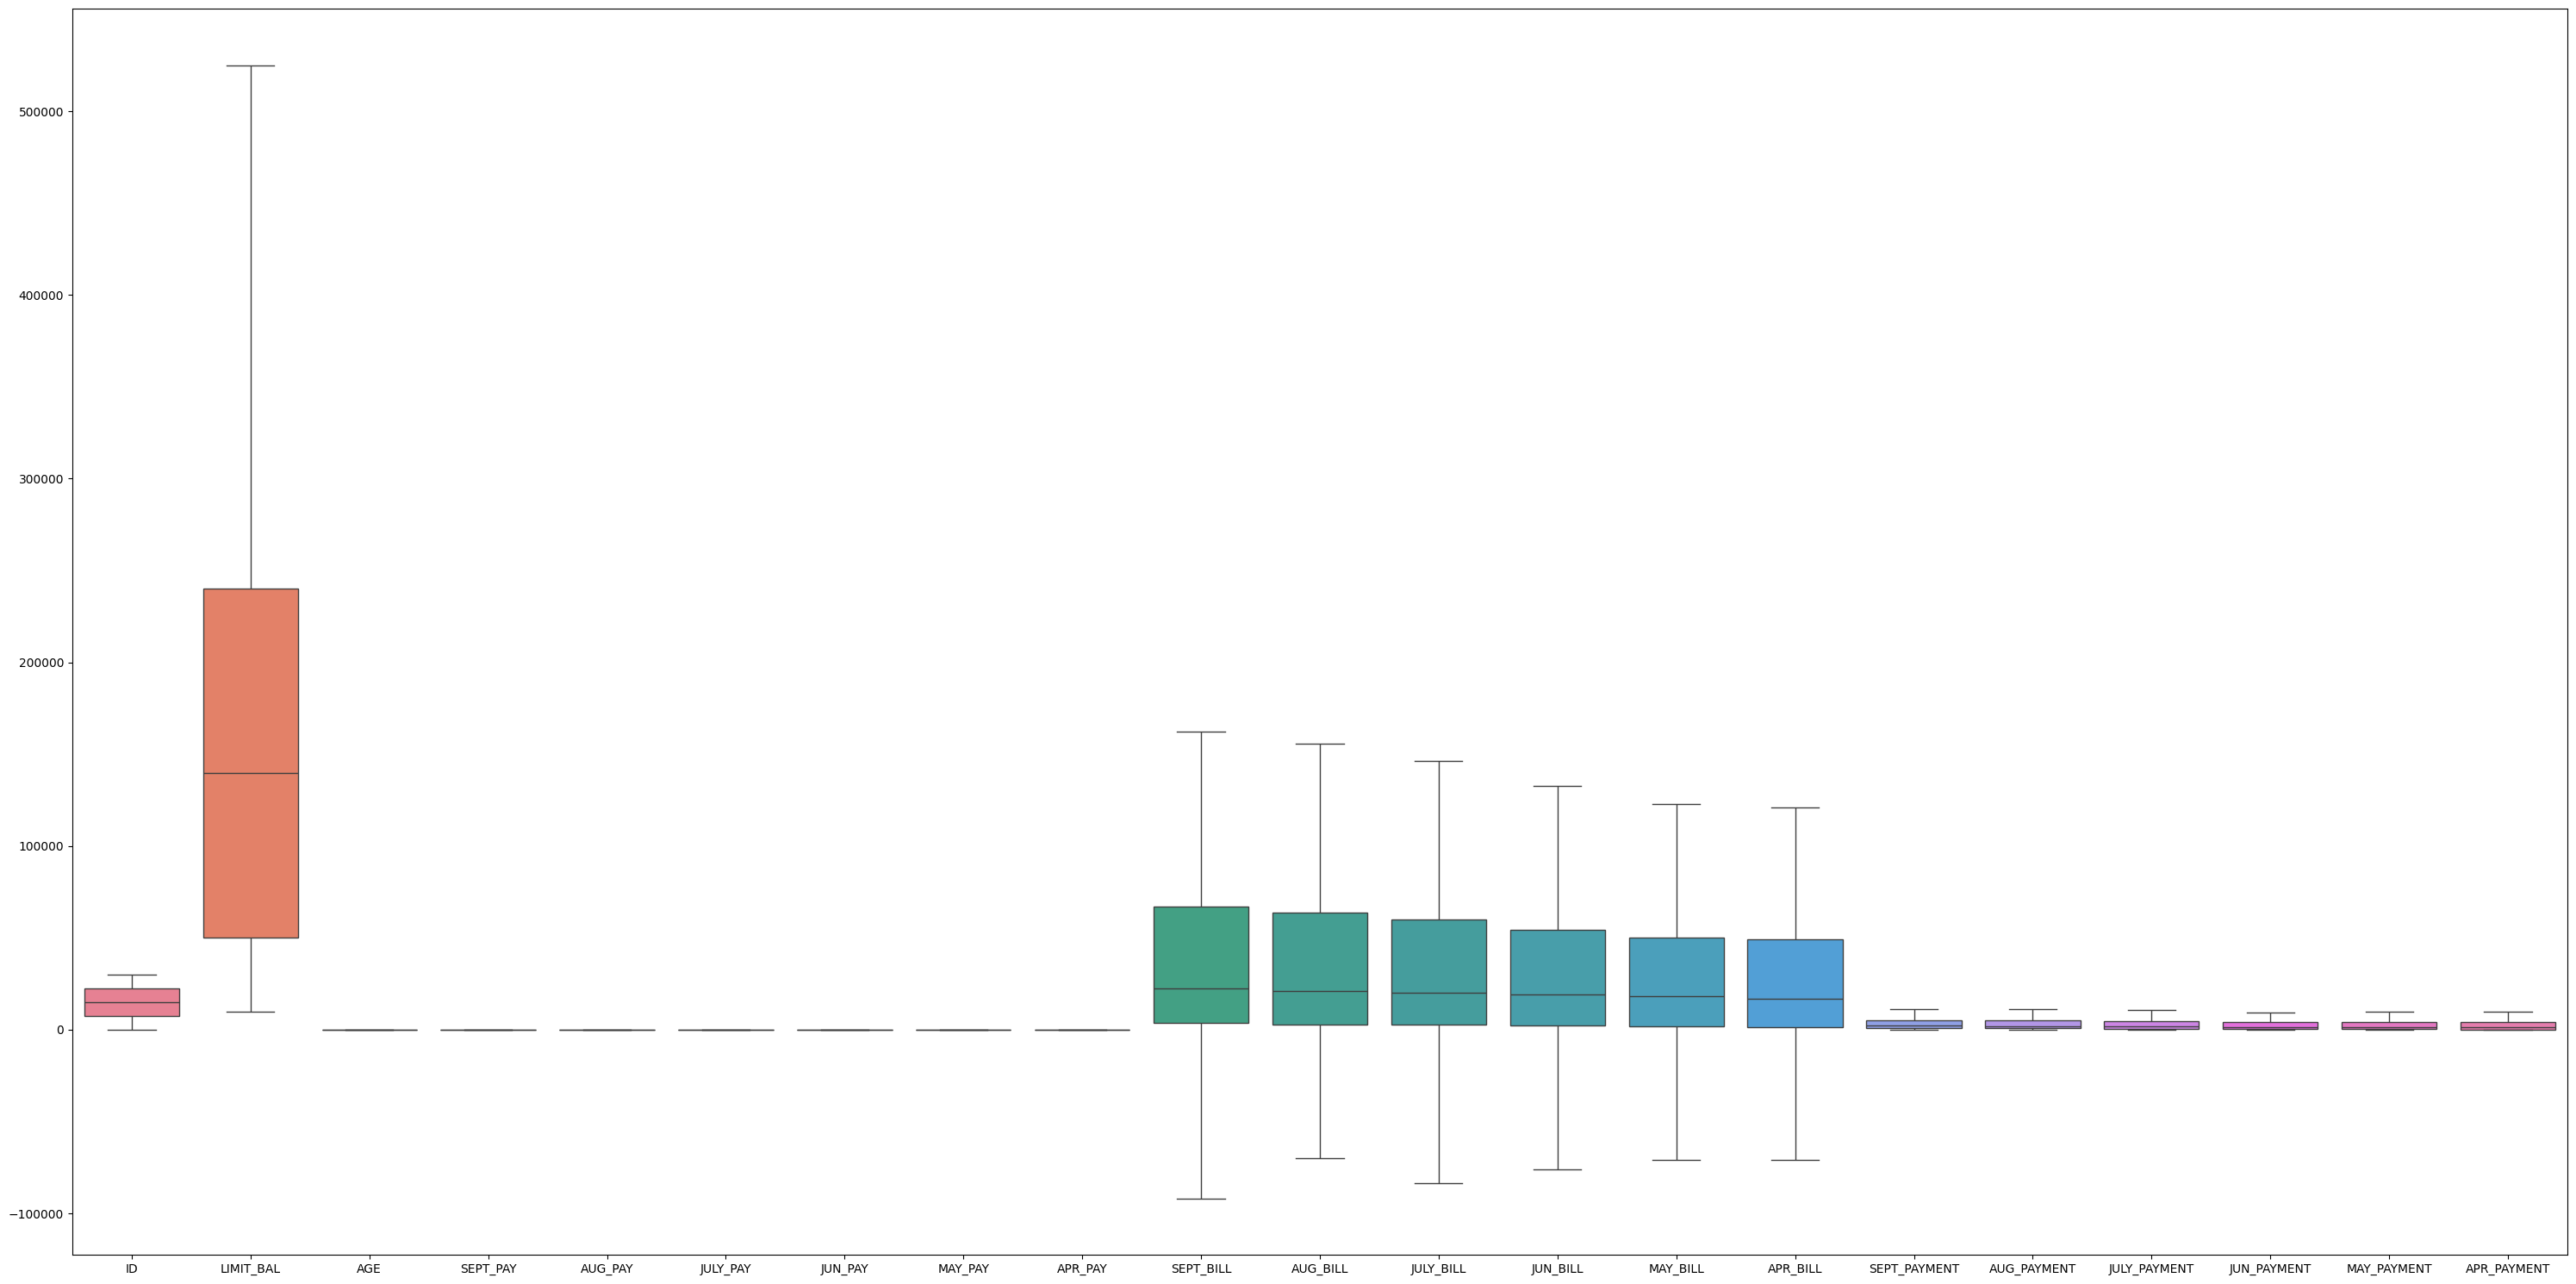

In [201]:
plt.figure(figsize=(30,15))
sns.boxplot(data=df1)
plt.tight_layout()
plt.show()

#### Correlation

In [202]:
df['Target'].value_counts()

Target
No     23364
Yes     6636
Name: count, dtype: int64

In [203]:
df1['Target'] = df1['Target'].map({'No': 0, 'Yes': 1})
df1

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,SEPT_PAY,AUG_PAY,JULY_PAY,JUN_PAY,...,JUN_BILL,MAY_BILL,APR_BILL,SEPT_PAYMENT,AUG_PAYMENT,JULY_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,Target
0,1,20000.0,F,PG,Married,24.0,1.5,1.5,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,F,PG,Single,26.0,-1.0,1.5,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,F,PG,Single,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,F,PG,Married,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,M,PG,Married,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,11250.5,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,M,HIGH_SCHOOL,Married,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,11250.5,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,M,HIGH_SCHOOL,Single,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,M,PG,Single,37.0,1.5,1.5,1.5,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,10677.5,4200.0,2000.0,3100.0,1
29998,29999,80000.0,M,HIGH_SCHOOL,Married,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,11015.0,3409.0,1178.0,1926.0,9700.0,1804.0,1


In [204]:
cor = df1.corr(numeric_only=True)
cor

,ID,LIMIT_BAL,AGE,SEPT_PAY,AUG_PAY,JULY_PAY,JUN_PAY,MAY_PAY,APR_PAY,SEPT_BILL,...,JUN_BILL,MAY_BILL,APR_BILL,SEPT_PAYMENT,AUG_PAYMENT,JULY_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,Target
ID,1.000000,0.026428,0.019147,-0.032481,-0.010198,-0.014786,-0.003767,-0.022187,-0.017826,0.017410,...,0.040608,0.015959,0.018622,0.010365,0.041859,0.078819,0.016662,0.012433,0.029365,-0.013952
LIMIT_BAL,0.026428,1.000000,0.144929,-0.281256,-0.308840,-0.296653,-0.275536,-0.254271,-0.237806,0.198285,...,0.209352,0.211746,0.207354,0.343157,0.353506,0.358593,0.349563,0.354400,0.371924,-0.154380
AGE,0.019147,0.144929,1.000000,-0.047814,-0.059234,-0.060760,-0.058576,-0.062664,-0.055502,0.038029,...,0.029304,0.026337,0.024887,0.038060,0.047249,0.039551,0.044055,0.040017,0.034892,0.013687
SEPT_PAY,-0.032481,-0.281256,-0.047814,1.000000,0.645076,0.559973,0.528837,0.503439,0.476768,0.251773,...,0.241646,0.239012,0.234894,-0.102186,-0.095138,-0.087057,-0.067292,-0.061694,-0.076801,0.291685
AUG_PAY,-0.010198,-0.308840,-0.059234,0.645076,1.000000,0.786833,0.694651,0.658172,0.615124,0.345197,...,0.325990,0.320417,0.315323,-0.044281,-0.010027,-0.011084,0.002347,0.009338,-0.003035,0.235276
JULY_PAY,-0.014786,-0.296653,-0.060760,0.559973,0.786833,1.000000,0.792073,0.705038,0.653343,0.319670,...,0.343079,0.335284,0.327733,0.114352,-0.040379,0.000133,0.021869,0.028235,0.009207,0.208608
JUN_PAY,-0.003767,-0.275536,-0.058576,0.528837,0.694651,0.792073,1.000000,0.820382,0.719471,0.319552,...,0.379892,0.370541,0.360876,0.087344,0.126888,-0.016672,0.037965,0.055232,0.040393,0.186960
MAY_PAY,-0.022187,-0.254271,-0.062664,0.503439,0.658172,0.705038,0.820382,1.000000,0.818823,0.318971,...,0.414625,0.406531,0.391663,0.084345,0.107406,0.134246,0.022686,0.070511,0.063572,0.172703
APR_PAY,-0.017826,-0.237806,-0.055502,0.476768,0.615124,0.653343,0.719471,0.818823,1.000000,0.316668,...,0.401270,0.433413,0.419766,0.088892,0.091165,0.113354,0.156453,0.045744,0.078345,0.156596
SEPT_BILL,0.017410,0.198285,0.038029,0.251773,0.345197,0.319670,0.319552,0.318971,0.316668,1.000000,...,0.852575,0.819291,0.793632,0.466516,0.424701,0.392170,0.403331,0.394699,0.379730,-0.029033


In [206]:
cor['Target'].sort_values(ascending=False)

Target          1.000000
SEPT_PAY        0.291685
AUG_PAY         0.235276
JULY_PAY        0.208608
JUN_PAY         0.186960
MAY_PAY         0.172703
APR_PAY         0.156596
AGE             0.013687
APR_BILL       -0.008845
MAY_BILL       -0.013471
ID             -0.013952
JUN_BILL       -0.016444
JULY_BILL      -0.020959
AUG_BILL       -0.022782
SEPT_BILL      -0.029033
MAY_PAYMENT    -0.108081
JUN_PAYMENT    -0.113716
APR_PAYMENT    -0.114552
JULY_PAYMENT   -0.124561
AUG_PAYMENT    -0.139699
SEPT_PAYMENT   -0.143442
LIMIT_BAL      -0.154380
Name: Target, dtype: float64

#### Heat Map

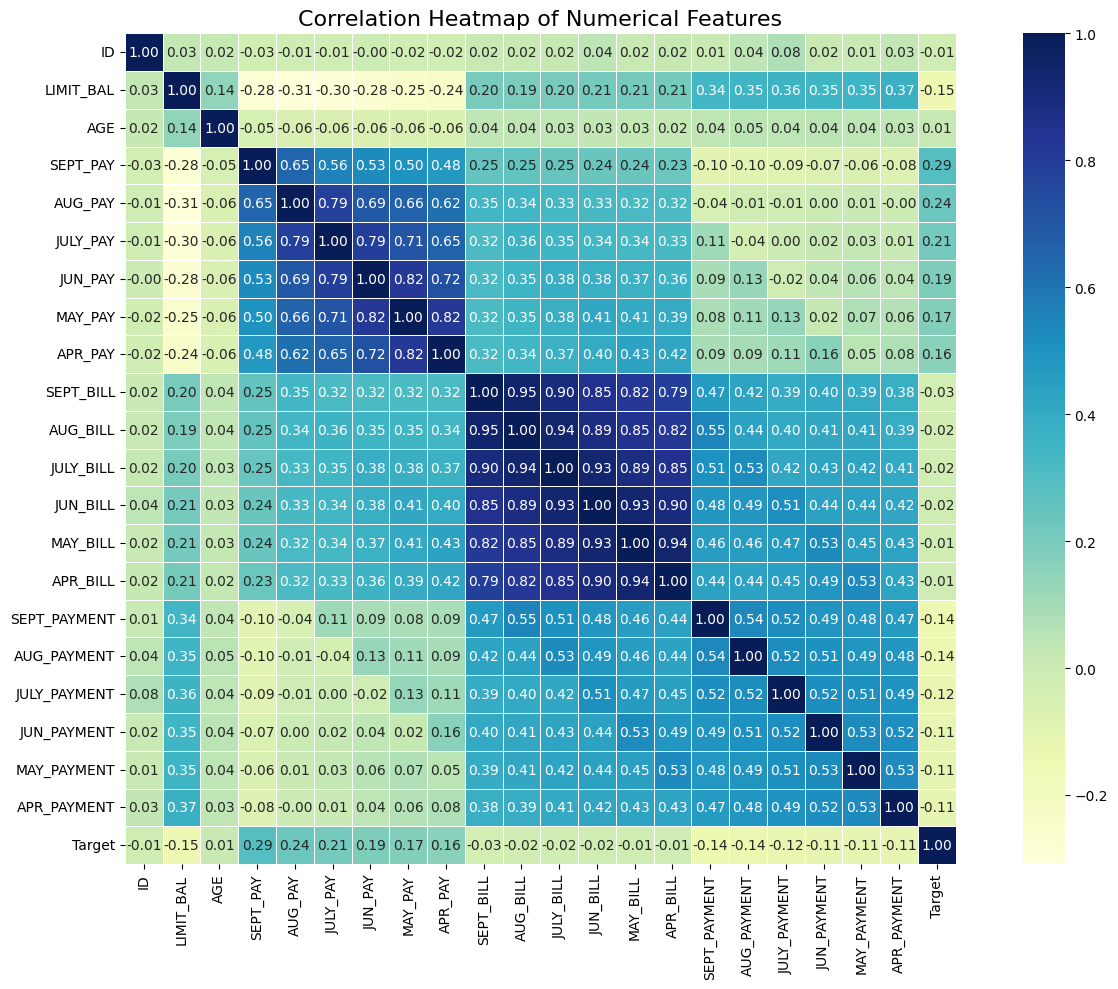

In [207]:
# Heatmap to show correlation
plt.figure(figsize=(14, 10))
sns.heatmap(cor, 
            annot=True, 
            fmt=".2f", 
            cmap='YlGnBu', 
            linewidths=0.5, 
            cbar=True,
            square=True)

# Displaying the heatmap
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

### Below are some Observation from the Dataset

- There are more females credit card holder,so Target value have high proportion of females.
  
- Target have a higher proportion of educated people (graduate school and university).

- Target have a higher proportion of Singles.

- Highest amount of bill was from september followed by august and july.

## Skew

In [208]:
df1= df1.select_dtypes(include='number')
df1

,ID,LIMIT_BAL,AGE,SEPT_PAY,AUG_PAY,JULY_PAY,JUN_PAY,MAY_PAY,APR_PAY,SEPT_BILL,...,JUN_BILL,MAY_BILL,APR_BILL,SEPT_PAYMENT,AUG_PAYMENT,JULY_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,Target
0,1,20000.0,24.0,1.5,1.5,-1.0,-1.0,-2.0,-2.0,3913.000,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,26.0,-1.0,1.5,0.0,0.0,0.0,1.5,2682.000,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.000,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.000,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.000,...,20940.0,19146.0,19131.0,2000.0,11250.5,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,162389.375,...,88004.0,31237.0,15980.0,8500.0,11250.5,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.000,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,37.0,1.5,1.5,1.5,-1.0,0.0,0.0,3565.000,...,20878.0,20582.0,19357.0,0.0,0.0,10677.5,4200.0,2000.0,3100.0,1
29998,29999,80000.0,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,-1645.000,...,52774.0,11855.0,48944.0,11015.0,3409.0,1178.0,1926.0,9700.0,1804.0,1


In [209]:
df1.skew()

ID              0.000000
LIMIT_BAL       0.904504
AGE             0.654467
SEPT_PAY       -0.224566
AUG_PAY        -0.015287
JULY_PAY       -0.024423
JUN_PAY        -0.075685
MAY_PAY        -0.128769
APR_PAY        -0.080431
SEPT_BILL       1.194178
AUG_BILL        1.189649
JULY_BILL       1.184730
JUN_BILL        1.183997
MAY_BILL        1.184657
APR_BILL        1.199718
SEPT_PAYMENT    1.032414
AUG_PAYMENT     1.113399
JULY_PAYMENT    1.200528
JUN_PAYMENT     1.176348
MAY_PAYMENT     1.183906
APR_PAYMENT     1.211015
Target          1.343504
dtype: float64

#### Skewness by power transformer method

In [210]:
pt=PowerTransformer(method='yeo-johnson')
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [211]:
df_transformed = pd.DataFrame(
    pt.fit_transform(df[numeric_cols]),
    columns=numeric_cols
)

In [212]:
df_transformed.skew()

ID             -0.291081
LIMIT_BAL      -0.080029
AGE             0.033520
SEPT_PAY       -0.012942
AUG_PAY         0.003610
JULY_PAY        0.011113
JUN_PAY         0.026121
MAY_PAY         0.041061
APR_PAY         0.041781
SEPT_BILL      -2.186410
AUG_BILL       -1.409826
JULY_BILL      -1.711258
JUN_BILL       -1.450557
MAY_BILL       -1.351760
APR_BILL       -1.084529
SEPT_PAYMENT   -0.486386
AUG_PAYMENT    -0.467856
JULY_PAYMENT   -0.430287
JUN_PAYMENT    -0.414227
MAY_PAYMENT    -0.422005
APR_PAYMENT    -0.417807
Target          1.343504
dtype: float64

#### Plotting Histogram

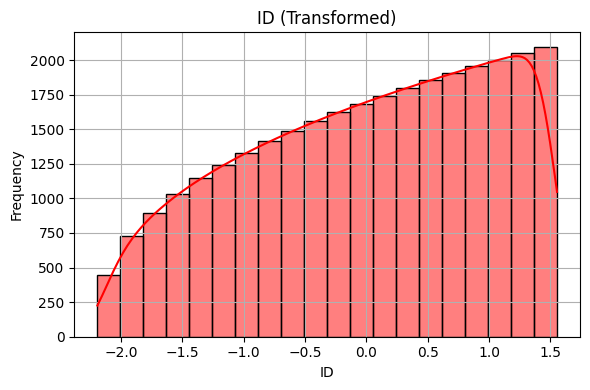

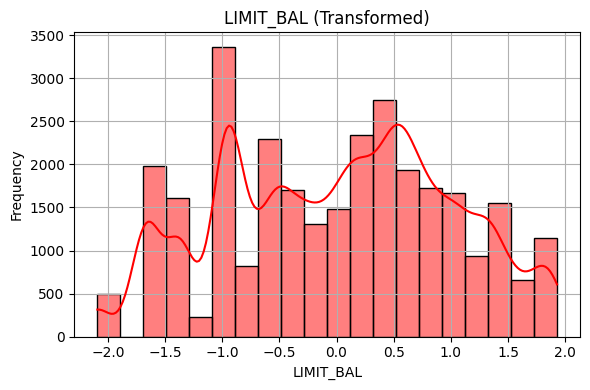

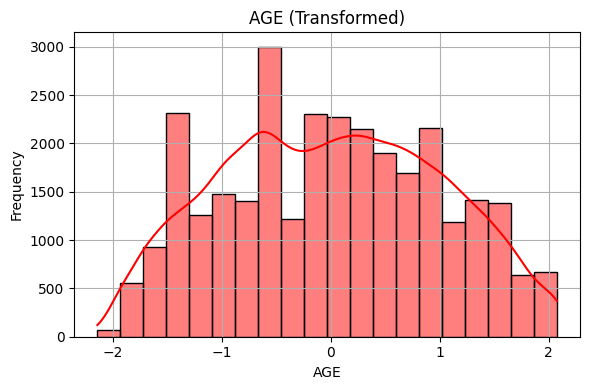

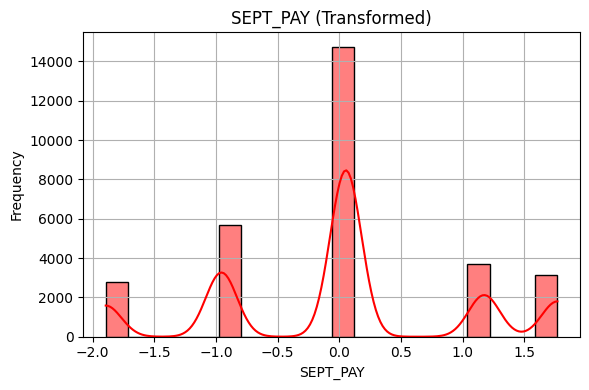

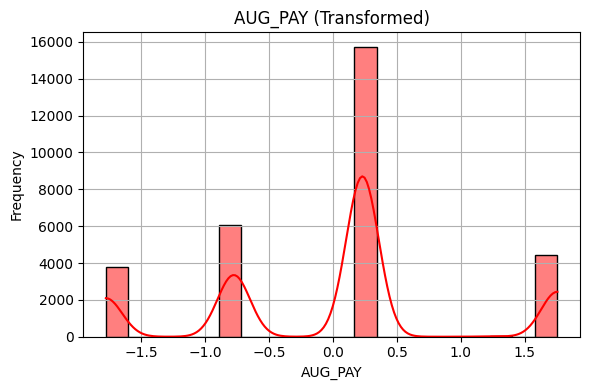

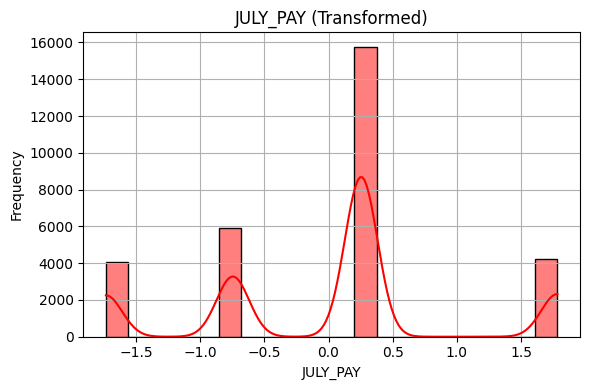

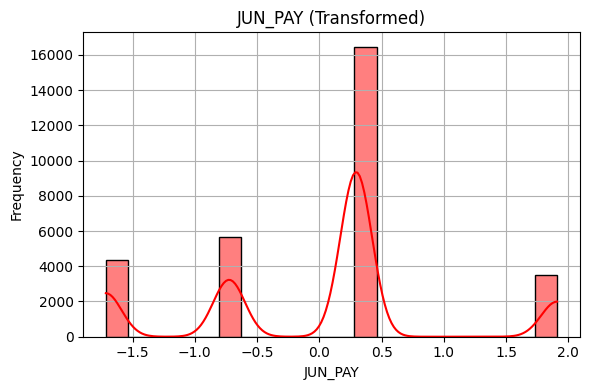

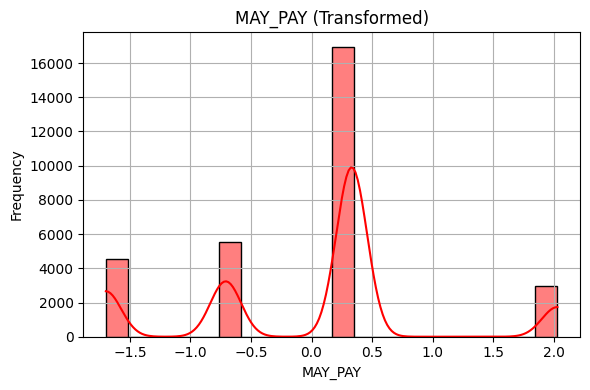

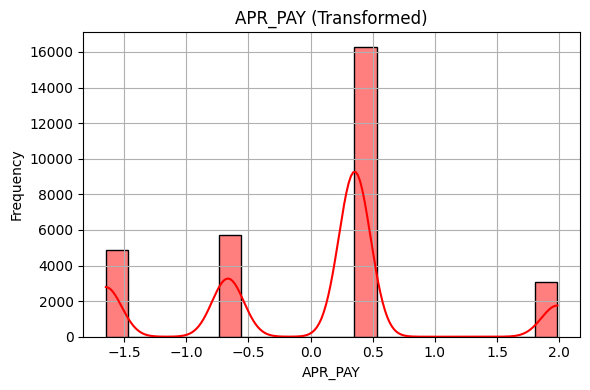

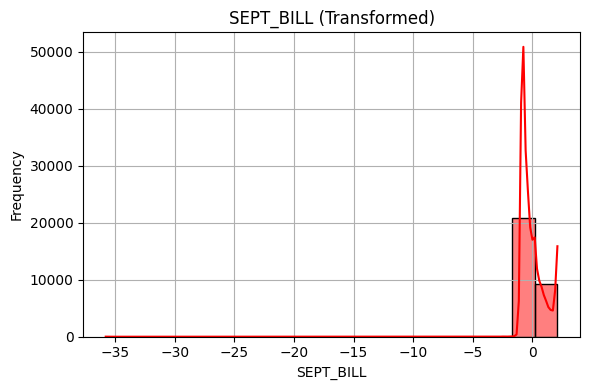

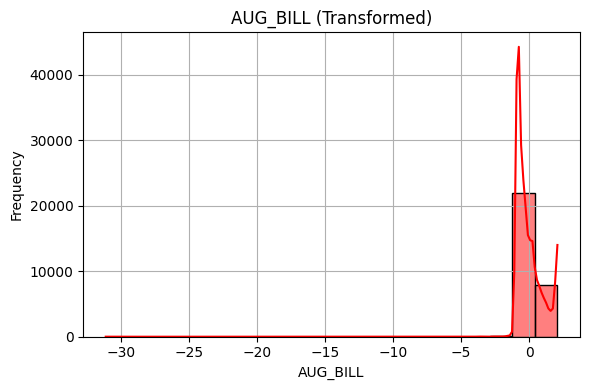

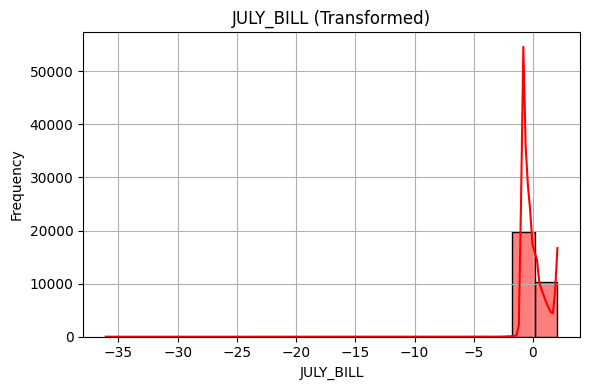

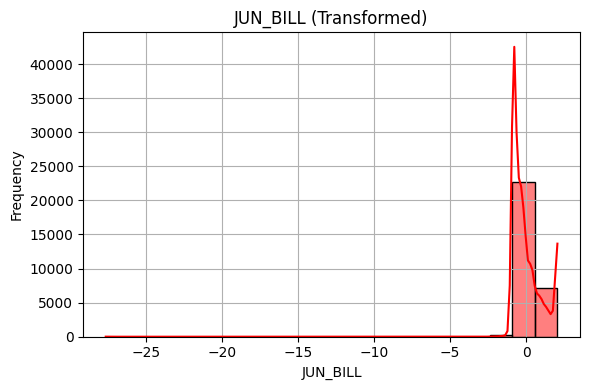

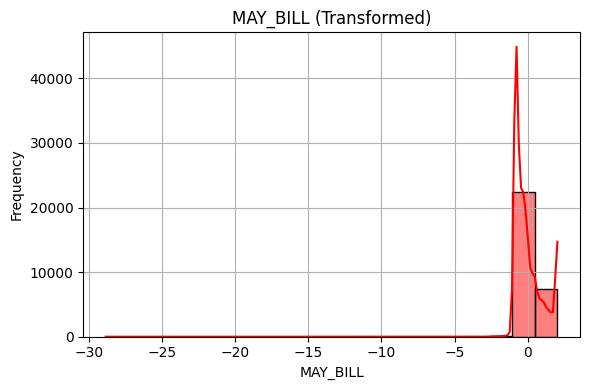

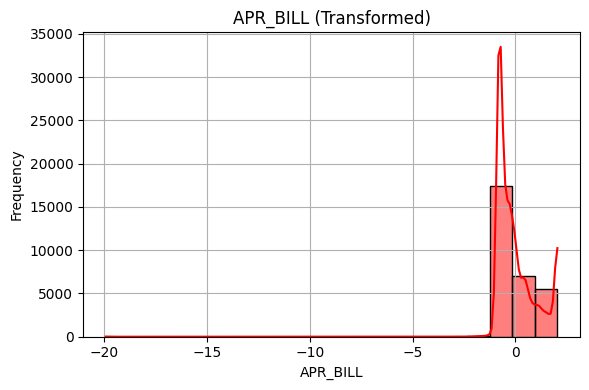

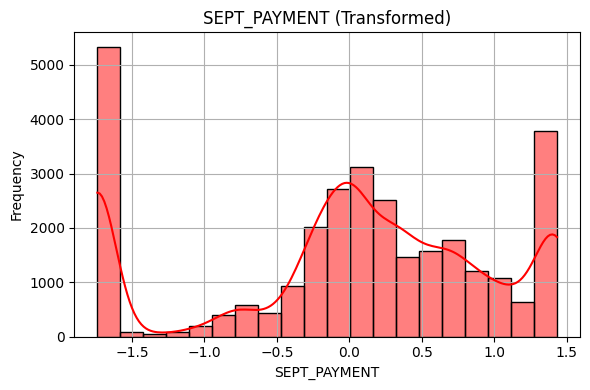

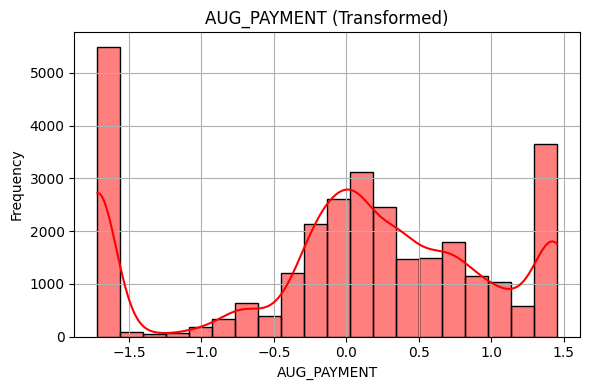

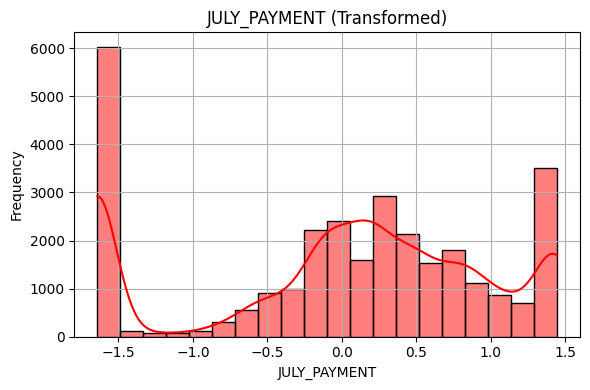

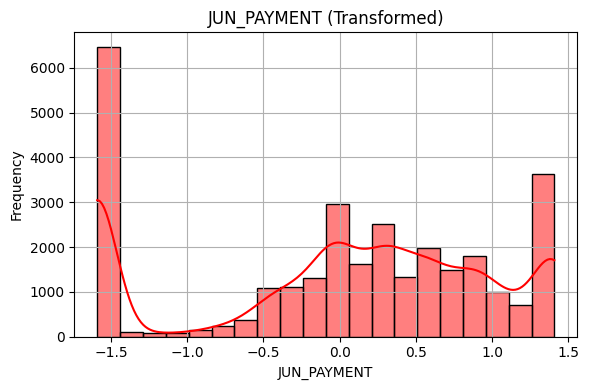

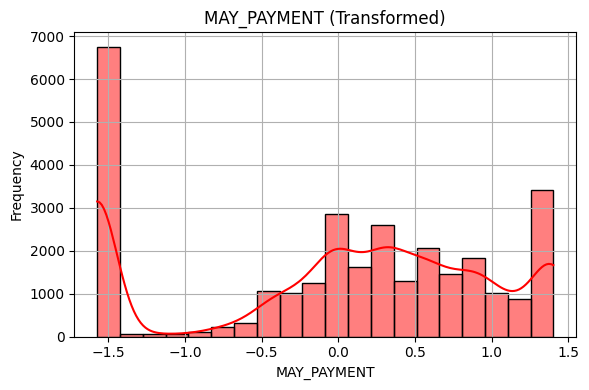

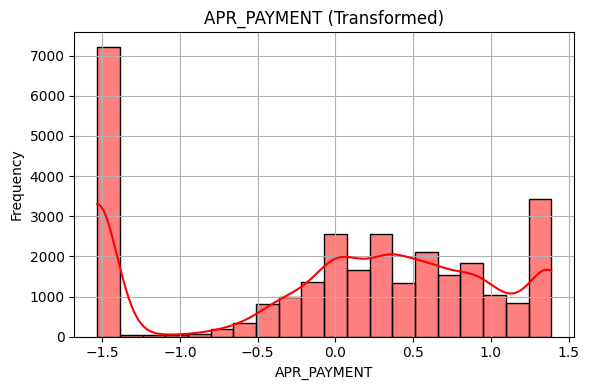

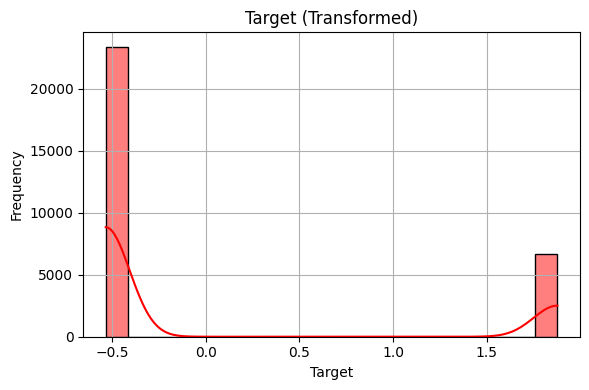

In [213]:
# Ploting the each column
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_transformed[col], kde=True, bins=20, color='red')
    plt.title(f"{col} (Transformed)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [214]:
df_transformed

,ID,LIMIT_BAL,AGE,SEPT_PAY,AUG_PAY,JULY_PAY,JUN_PAY,MAY_PAY,APR_PAY,SEPT_BILL,...,JUN_BILL,MAY_BILL,APR_BILL,SEPT_PAYMENT,AUG_PAYMENT,JULY_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,Target
0,-2.192698,-1.663086,-1.502650,1.768599,1.754474,-0.745790,-0.724317,-1.698568,-1.647202,-0.778886,...,-0.870146,-0.856743,-0.820634,-1.738759,-0.481385,-1.641499,-1.590463,-1.571889,-1.533546,1.876378
1,-2.191315,-0.092733,-1.134901,-0.955095,1.754474,0.254091,0.296104,0.331506,1.985387,-0.812835,...,-0.753012,-0.725488,-0.703165,-1.738759,-0.308669,-0.149689,-0.040647,-1.571889,0.354978,1.876378
2,-2.190062,-0.399782,0.012478,0.053393,0.230658,0.254091,0.296104,0.331506,0.354154,-0.212111,...,-0.447799,-0.390719,-0.353813,-0.131513,-0.096773,-0.149689,-0.040647,-0.029434,0.901868,-0.532942
3,-2.188899,-0.956424,0.348126,0.053393,0.230658,0.254091,0.296104,0.331506,0.354154,0.134601,...,-0.107373,-0.031080,0.002364,0.031677,0.076155,-0.060084,0.005145,0.002048,0.013257,-0.532942
4,-2.187802,-0.956424,1.885161,-0.955095,0.230658,-0.745790,0.296104,0.331506,0.354154,-0.660035,...,-0.283127,-0.279470,-0.260010,0.031677,1.453542,1.386858,1.355422,-0.195857,-0.154552,-0.532942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.553656,0.639499,0.551069,0.053393,0.230658,0.254091,0.296104,0.331506,0.354154,2.103877,...,1.171211,0.024801,-0.342402,1.167869,1.453542,0.819655,0.570555,0.897631,0.013257,-0.532942
29996,1.553744,0.162743,0.915552,-0.955095,-0.774943,-0.745790,-0.724317,0.331506,0.354154,-0.842052,...,-0.588708,-0.670100,-0.820634,-0.020171,0.446466,1.293311,-0.797932,-1.571889,-1.533546,-0.532942
29997,1.553833,-1.372221,0.348126,1.768599,1.754474,1.782936,-0.724317,0.331506,0.354154,-0.788306,...,-0.284636,-0.242208,-0.254164,-1.738759,-1.717726,1.446310,0.781106,0.324703,0.601810,1.876378
29998,1.553921,-0.518649,0.739669,1.174678,-0.774943,0.254091,0.296104,0.331506,-0.665105,-1.256182,...,0.439458,-0.475391,0.464586,1.432639,0.422207,-0.069382,0.297852,1.401737,0.300513,1.876378


### Feature Engineering

**Encoding** 

##### Label encoding 

In [215]:
df['MARRIAGE'] = df['MARRIAGE'].astype(str)

In [216]:
# Using Label encoding for y variable and SEX column
#Label encoding 
encode_num = {"SEX":{"F":0,"M":1}, "Target":{"Yes":1,"No":0}}
df=df.replace(encode_num)

In [217]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,SEPT_PAY,AUG_PAY,JULY_PAY,JUN_PAY,...,JUN_BILL,MAY_BILL,APR_BILL,SEPT_PAYMENT,AUG_PAYMENT,JULY_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,Target
0,1,20000.0,0,PG,Married,24.0,1.5,1.5,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,0,PG,Single,26.0,-1.0,1.5,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,0,PG,Single,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,0,PG,Married,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,PG,Married,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,11250.5,10000.0,9000.0,689.0,679.0,0


##### Onehot encoding

In [218]:
df['EDUCATION'] = df['EDUCATION'].astype(str)

In [219]:
ohe=OneHotEncoder(sparse_output=False,drop=None)
edu = ohe.fit_transform(df[['EDUCATION']])
cols= ohe.get_feature_names_out(['EDUCATION'])
df_encoded=pd.DataFrame(edu,columns=cols)
df_encoded

,EDUCATION_0,EDUCATION_5,EDUCATION_6,EDUCATION_HIGH_SCHOOL,EDUCATION_OTHERS,EDUCATION_PG,EDUCATION_UG
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
29995,0.0,0.0,0.0,1.0,0.0,0.0,0.0
29996,0.0,0.0,0.0,1.0,0.0,0.0,0.0
29997,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29998,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [220]:
merge=pd.concat([df.drop('EDUCATION',axis=1), df_encoded],axis=1)
merge= pd.DataFrame(merge)
merge

,ID,LIMIT_BAL,SEX,MARRIAGE,AGE,SEPT_PAY,AUG_PAY,JULY_PAY,JUN_PAY,MAY_PAY,...,MAY_PAYMENT,APR_PAYMENT,Target,EDUCATION_0,EDUCATION_5,EDUCATION_6,EDUCATION_HIGH_SCHOOL,EDUCATION_OTHERS,EDUCATION_PG,EDUCATION_UG
0,1,20000.0,0,Married,24.0,1.5,1.5,-1.0,-1.0,-2.0,...,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,120000.0,0,Single,26.0,-1.0,1.5,0.0,0.0,0.0,...,0.0,2000.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,90000.0,0,Single,34.0,0.0,0.0,0.0,0.0,0.0,...,1000.0,5000.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,50000.0,0,Married,37.0,0.0,0.0,0.0,0.0,0.0,...,1069.0,1000.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,50000.0,1,Married,57.0,-1.0,0.0,-1.0,0.0,0.0,...,689.0,679.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,Married,39.0,0.0,0.0,0.0,0.0,0.0,...,5000.0,1000.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
29996,29997,150000.0,1,Single,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
29997,29998,30000.0,1,Single,37.0,1.5,1.5,1.5,-1.0,0.0,...,2000.0,3100.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29998,29999,80000.0,1,Married,41.0,1.0,-1.0,0.0,0.0,0.0,...,9700.0,1804.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [221]:
marriage = ohe.fit_transform(merge[['MARRIAGE']])
cols= ohe.get_feature_names_out(['MARRIAGE'])
df_encode=pd.DataFrame(marriage,columns=cols)
df_encode

,MARRIAGE_Married,MARRIAGE_OTHERS,MARRIAGE_Others,MARRIAGE_Single
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
29995,1.0,0.0,0.0,0.0
29996,0.0,0.0,0.0,1.0
29997,0.0,0.0,0.0,1.0
29998,1.0,0.0,0.0,0.0


In [222]:
df1=pd.concat([merge.drop('MARRIAGE',axis=1), df_encode],axis=1)
df1

,ID,LIMIT_BAL,SEX,AGE,SEPT_PAY,AUG_PAY,JULY_PAY,JUN_PAY,MAY_PAY,APR_PAY,...,EDUCATION_5,EDUCATION_6,EDUCATION_HIGH_SCHOOL,EDUCATION_OTHERS,EDUCATION_PG,EDUCATION_UG,MARRIAGE_Married,MARRIAGE_OTHERS,MARRIAGE_Others,MARRIAGE_Single
0,1,20000.0,0,24.0,1.5,1.5,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,2,120000.0,0,26.0,-1.0,1.5,0.0,0.0,0.0,1.5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3,90000.0,0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,4,50000.0,0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,5,50000.0,1,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,39.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
29996,29997,150000.0,1,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29997,29998,30000.0,1,37.0,1.5,1.5,1.5,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
29998,29999,80000.0,1,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [258]:
print('Length of Encoded clean data frame',len(df1))

Length of Encoded clean data frame 30000


In [259]:
df1.shape

(30000, 34)

 ### Handling Class Imbalance

**Since this data is imbalanced , using SMOTE (Synthetic Minority Oversampling Technique) to handle imbalance**

### SMOTE

In [225]:
# Using SMOTE
smote = SMOTE()

In [226]:
x_smote, y_smote = smote.fit_resample(df1[(i for i in list(df1.describe(include='all').columns) if i != 'Target')], df1['Target'])

In [227]:
print('length of y smote',len(y_smote))

length of y smote 46728


In [228]:
balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(df1.describe(include='all').columns) if i != 'Target'))

In [229]:
balanced_df

,ID,LIMIT_BAL,SEX,AGE,SEPT_PAY,AUG_PAY,JULY_PAY,JUN_PAY,MAY_PAY,APR_PAY,...,EDUCATION_5,EDUCATION_6,EDUCATION_HIGH_SCHOOL,EDUCATION_OTHERS,EDUCATION_PG,EDUCATION_UG,MARRIAGE_Married,MARRIAGE_OTHERS,MARRIAGE_Others,MARRIAGE_Single
0,1,20000.000000,0,24.000000,1.500000,1.500000,-1.000000,-1.000000,-2.000000,-2.000000,...,0.0,0.0,0.0,0.0,1.000000,0.000000,1.000000,0.0,0.0,0.000000
1,2,120000.000000,0,26.000000,-1.000000,1.500000,0.000000,0.000000,0.000000,1.500000,...,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.0,1.000000
2,3,90000.000000,0,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.0,1.000000
3,4,50000.000000,0,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.000000,0.000000,1.000000,0.0,0.0,0.000000
4,5,50000.000000,1,57.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.000000,0.000000,1.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,1109,229755.592388,0,34.342171,0.036661,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.975559,0.024441,1.000000,0.0,0.0,0.000000
46724,18211,20000.000000,0,25.290814,1.317177,1.500000,1.500000,1.500000,0.548469,0.548469,...,0.0,0.0,0.0,0.0,1.000000,0.000000,0.365646,0.0,0.0,0.634354
46725,10140,150000.000000,0,38.290531,-1.155406,-1.155406,-1.155406,-1.155406,-2.000000,-2.000000,...,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.0,0.0,1.000000
46726,23594,20000.000000,0,41.561588,-0.537665,-0.537665,-0.537665,0.277401,0.277401,-1.352732,...,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.0,1.000000


In [232]:
balanced_df['Target'] = y_smote

In [233]:
balanced_df

,ID,LIMIT_BAL,SEX,AGE,SEPT_PAY,AUG_PAY,JULY_PAY,JUN_PAY,MAY_PAY,APR_PAY,...,EDUCATION_6,EDUCATION_HIGH_SCHOOL,EDUCATION_OTHERS,EDUCATION_PG,EDUCATION_UG,MARRIAGE_Married,MARRIAGE_OTHERS,MARRIAGE_Others,MARRIAGE_Single,Target
0,1,20000.000000,0,24.000000,1.500000,1.500000,-1.000000,-1.000000,-2.000000,-2.000000,...,0.0,0.0,0.0,1.000000,0.000000,1.000000,0.0,0.0,0.000000,1
1,2,120000.000000,0,26.000000,-1.000000,1.500000,0.000000,0.000000,0.000000,1.500000,...,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.0,1.000000,1
2,3,90000.000000,0,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.0,1.000000,0
3,4,50000.000000,0,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.000000,0.000000,1.000000,0.0,0.0,0.000000,0
4,5,50000.000000,1,57.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.000000,0.000000,1.000000,0.0,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,1109,229755.592388,0,34.342171,0.036661,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.975559,0.024441,1.000000,0.0,0.0,0.000000,1
46724,18211,20000.000000,0,25.290814,1.317177,1.500000,1.500000,1.500000,0.548469,0.548469,...,0.0,0.0,0.0,1.000000,0.000000,0.365646,0.0,0.0,0.634354,1
46725,10140,150000.000000,0,38.290531,-1.155406,-1.155406,-1.155406,-1.155406,-2.000000,-2.000000,...,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.0,0.0,1.000000,1
46726,23594,20000.000000,0,41.561588,-0.537665,-0.537665,-0.537665,0.277401,0.277401,-1.352732,...,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.0,1.000000,1


In [234]:
balanced_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'AGE', 'SEPT_PAY', 'AUG_PAY', 'JULY_PAY',
       'JUN_PAY', 'MAY_PAY', 'APR_PAY', 'SEPT_BILL', 'AUG_BILL', 'JULY_BILL',
       'JUN_BILL', 'MAY_BILL', 'APR_BILL', 'SEPT_PAYMENT', 'AUG_PAYMENT',
       'JULY_PAYMENT', 'JUN_PAYMENT', 'MAY_PAYMENT', 'APR_PAYMENT',
       'EDUCATION_0', 'EDUCATION_5', 'EDUCATION_6', 'EDUCATION_HIGH_SCHOOL',
       'EDUCATION_OTHERS', 'EDUCATION_PG', 'EDUCATION_UG', 'MARRIAGE_Married',
       'MARRIAGE_OTHERS', 'MARRIAGE_Others', 'MARRIAGE_Single', 'Target'],
      dtype='object')

**Adding target variable to newly created dataframe**

In [235]:
balanced_df['Target'] = y_smote

In [236]:
balanced_df.shape

(46728, 34)

In [237]:
balanced_df['Target'].value_counts()

Target
1    23364
0    23364
Name: count, dtype: int64

In [238]:
balanced_df.to_csv("balanced dataset.csv",index=False)

### Feature Selection

In [239]:
skb= SelectKBest(score_func=f_classif,k=25)
y= balanced_df['Target']
X= balanced_df.drop('Target', axis=1)

In [240]:
X.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'AGE', 'SEPT_PAY', 'AUG_PAY', 'JULY_PAY',
       'JUN_PAY', 'MAY_PAY', 'APR_PAY', 'SEPT_BILL', 'AUG_BILL', 'JULY_BILL',
       'JUN_BILL', 'MAY_BILL', 'APR_BILL', 'SEPT_PAYMENT', 'AUG_PAYMENT',
       'JULY_PAYMENT', 'JUN_PAYMENT', 'MAY_PAYMENT', 'APR_PAYMENT',
       'EDUCATION_0', 'EDUCATION_5', 'EDUCATION_6', 'EDUCATION_HIGH_SCHOOL',
       'EDUCATION_OTHERS', 'EDUCATION_PG', 'EDUCATION_UG', 'MARRIAGE_Married',
       'MARRIAGE_OTHERS', 'MARRIAGE_Others', 'MARRIAGE_Single'],
      dtype='object')

In [241]:
y

0        1
1        1
2        0
3        0
4        0
        ..
46723    1
46724    1
46725    1
46726    1
46727    1
Name: Target, Length: 46728, dtype: int64

In [242]:
X_new = skb.fit_transform(X , y)

In [243]:
selected_columns= X.columns[skb.get_support()]
selected_columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'SEPT_PAY', 'AUG_PAY', 'JULY_PAY', 'JUN_PAY',
       'MAY_PAY', 'APR_PAY', 'SEPT_BILL', 'AUG_BILL', 'JULY_BILL',
       'SEPT_PAYMENT', 'AUG_PAYMENT', 'JULY_PAYMENT', 'JUN_PAYMENT',
       'MAY_PAYMENT', 'APR_PAYMENT', 'EDUCATION_5', 'EDUCATION_HIGH_SCHOOL',
       'EDUCATION_OTHERS', 'EDUCATION_PG', 'EDUCATION_UG', 'MARRIAGE_Married',
       'MARRIAGE_Single'],
      dtype='object')

**Feature Selection score of each column**

In [244]:
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': skb.scores_
}).sort_values(by='Score', ascending=False)
feature_scores

,Feature,Score
4,SEPT_PAY,6502.712313
5,AUG_PAY,3811.152319
6,JULY_PAY,2933.857888
7,JUN_PAY,2386.114078
8,MAY_PAY,2058.726990
16,SEPT_PAYMENT,1873.963950
1,LIMIT_BAL,1761.537652
17,AUG_PAYMENT,1727.784848
9,APR_PAY,1712.110757
18,JULY_PAYMENT,1427.418446


In [245]:
X_selected= X[selected_columns]
X_selected

,LIMIT_BAL,SEX,AGE,SEPT_PAY,AUG_PAY,JULY_PAY,JUN_PAY,MAY_PAY,APR_PAY,SEPT_BILL,...,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,EDUCATION_5,EDUCATION_HIGH_SCHOOL,EDUCATION_OTHERS,EDUCATION_PG,EDUCATION_UG,MARRIAGE_Married,MARRIAGE_Single
0,20000.000000,0,24.000000,1.500000,1.500000,-1.000000,-1.000000,-2.000000,-2.000000,3913.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000,1.000000,0.000000
1,120000.000000,0,26.000000,-1.000000,1.500000,0.000000,0.000000,0.000000,1.500000,2682.000000,...,1000.000000,0.000000,2000.000000,0.0,0.0,0.0,1.000000,0.000000,0.000000,1.000000
2,90000.000000,0,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29239.000000,...,1000.000000,1000.000000,5000.000000,0.0,0.0,0.0,1.000000,0.000000,0.000000,1.000000
3,50000.000000,0,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46990.000000,...,1100.000000,1069.000000,1000.000000,0.0,0.0,0.0,1.000000,0.000000,1.000000,0.000000
4,50000.000000,1,57.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,8617.000000,...,9000.000000,689.000000,679.000000,0.0,0.0,0.0,1.000000,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,229755.592388,0,34.342171,0.036661,0.000000,0.000000,0.000000,0.000000,0.000000,162389.375000,...,5373.177299,4473.249791,4458.102733,0.0,0.0,0.0,0.975559,0.024441,1.000000,0.000000
46724,20000.000000,0,25.290814,1.317177,1.500000,1.500000,1.500000,0.548469,0.548469,7781.529432,...,645.396133,1502.150192,146.258414,0.0,0.0,0.0,1.000000,0.000000,0.365646,0.634354
46725,150000.000000,0,38.290531,-1.155406,-1.155406,-1.155406,-1.155406,-2.000000,-2.000000,6611.124712,...,0.000000,0.000000,62.007089,0.0,0.0,0.0,0.000000,1.000000,0.000000,1.000000
46726,20000.000000,0,41.561588,-0.537665,-0.537665,-0.537665,0.277401,0.277401,-1.352732,597.888685,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.000000,1.000000


In [260]:
X_selected.to_csv('Featured Data.csv',index= False)

## Scaling

In [261]:
ss= StandardScaler()
X_scaled= ss.fit_transform(X_selected)

## Train Test Split

In [262]:
X_train,X_test,y_train,y_test= train_test_split(X_scaled,y,test_size=0.2,random_state=40)

In [263]:
print('X_train :',X_train.shape)
print('X_test :',X_test.shape)
print('y_train:',y_train.shape)
print('y_test :',y_test.shape)

X_train : (37382, 25)
X_test : (9346, 25)
y_train: (37382,)
y_test : (9346,)


In [264]:
y.value_counts()    

Target
1    23364
0    23364
Name: count, dtype: int64

## Machine Learning 

In [265]:
#Machine learning Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "AdaBoost": AdaBoostClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100)
}

In [266]:
model_scores = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy= accuracy_score(y_test,y_pred)
    precision= precision_score(y_test,y_pred)
    f1= f1_score(y_test,y_pred)
    recall= recall_score(y_test,y_pred)
    model_scores.append({
        "Model": name,
        "accuracy": round(accuracy, 2),
        "precision": round(precision, 2),
        "f1": round(f1, 2),
        "recall": round(recall, 2)
    })
# Convert to DataFrame for nice display
result_df = pd.DataFrame(model_scores)
print(result_df)

                 Model  accuracy  precision    f1  recall
0  Logistic Regression      0.69       0.70  0.70    0.70
1        Decision Tree      0.81       0.81  0.82    0.82
2        Random Forest      0.88       0.93  0.88    0.83
3             AdaBoost      0.86       0.93  0.85    0.78
4    Gradient Boosting      0.87       0.94  0.87    0.80


### Hyperparameter Tuning

**Hyperparameter Tuning is done using GridSearch cross validation for Random Forest Classifier**

In [267]:
param_grid={'n_estimators':[50,100,150] ,      #no.of trees
            'max_depth':[None,5,10]  ,         #depth of tree
             'min_samples_split':[2,5] ,       #minimum samples to split a node
            'min_samples_leaf':[1,2] ,          #minimum samples at a leaf node
             'max_features':['sqrt','log2']   #no. of features to considered
}

**Evaluation is done for the tuned model**

In [268]:
gridsearch= GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid, cv=5, scoring='accuracy',n_jobs= -1, verbose=1)   #cross validation

In [269]:
gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=1)

**Output for the best parameters and accuracy**

In [270]:
print("Best Parameters:", gridsearch.best_params_)
print("Best CV Score:", gridsearch.best_score_)

Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best CV Score: 0.8756888486919007


In [271]:
best_model= gridsearch.best_estimator_

In [272]:
y_pred= best_model.predict(X_test)

In [273]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89      4610
           1       0.93      0.83      0.88      4736

    accuracy                           0.88      9346
   macro avg       0.89      0.88      0.88      9346
weighted avg       0.89      0.88      0.88      9346

Accuracy: 0.8830515728653969


### Pipeline

In [274]:
 #Define the pipeline steps
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),      # Handle missing values (if required)
    ('scaler', StandardScaler()),                       # Feature scaling
    ('model', RandomForestClassifier(random_state=42))  # ML model
])
# Train pipeline
pipeline.fit(X_train, y_train)
# Predict
y_pred = pipeline.predict(X_test)
# Evaluate the model
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy : 0.8829445752193452
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4610
           1       0.93      0.83      0.88      4736

    accuracy                           0.88      9346
   macro avg       0.89      0.88      0.88      9346
weighted avg       0.89      0.88      0.88      9346



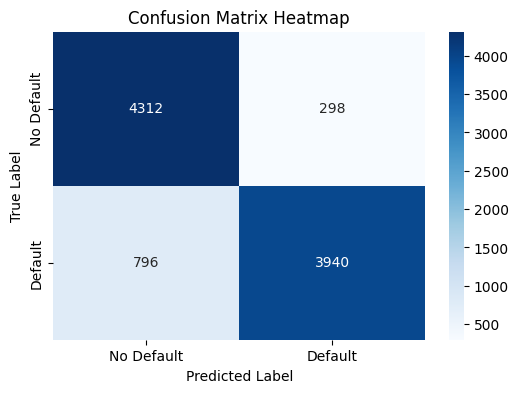

In [275]:
# Plot heatmap
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Default', 'Default'], 
            yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Saving in Joblib

In [276]:
joblib.dump(pipeline,'Credit.joblib')

['Credit.joblib']

In [277]:
loaded_pipeline=joblib.load('Credit.joblib')

### unseen data prediction

In [278]:
df_unseen=pd.read_csv('unseen_data.csv')
df_unseen

,LIMIT_BAL,SEX,AGE,SEPT_PAY,AUG_PAY,JULY_PAY,JUN_PAY,MAY_PAY,APR_PAY,SEPT_BILL,...,MAY_PAYMENT,APR_PAYMENT,EDUCATION_5,EDUCATION_HIGH_SCHOOL,EDUCATION_OTHERS,EDUCATION_PG,EDUCATION_UG,MARRIAGE_Married,MARRIAGE_Single,Target
0,20000,0,24,1.5,1.5,-1.0,-1.0,-2.0,-2.0,3913.000,...,0,0.000,0,0,0,1,0,1,0,1
1,120000,0,26,-1.0,1.5,0.0,0.0,0.0,1.5,2682.000,...,0,2000.000,0,0,0,1,0,0,1,1
2,90000,0,34,0.0,0.0,0.0,0.0,0.0,0.0,29239.000,...,1000,5000.000,0,0,0,1,0,0,1,0
3,50000,0,37,0.0,0.0,0.0,0.0,0.0,0.0,46990.000,...,1069,1000.000,0,0,0,1,0,1,0,0
4,50000,1,57,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.000,...,689,679.000,0,0,0,1,0,1,0,0
5,50000,1,37,0.0,0.0,0.0,0.0,0.0,0.0,64400.000,...,1000,800.000,0,0,0,0,1,0,1,0
6,500000,1,29,0.0,0.0,0.0,0.0,0.0,0.0,162389.375,...,9700,9823.375,0,0,0,0,1,0,1,0
7,100000,0,23,0.0,-1.0,-1.0,0.0,0.0,-1.0,11876.000,...,1687,1542.000,0,0,0,1,0,0,1,0
8,140000,0,28,0.0,0.0,1.5,0.0,0.0,0.0,11285.000,...,1000,1000.000,0,1,0,0,0,1,0,0
9,20000,1,35,-2.0,-2.0,-2.0,-2.0,-1.0,-1.0,0.000,...,1122,0.000,0,1,0,0,0,0,1,0


In [279]:
x_unseen=df_unseen.drop("Target", axis=1)
y_unseen=df_unseen['Target']

In [280]:
y_unseen_pred=loaded_pipeline.predict(x_unseen)

In [281]:
df_unseen['predicted']=y_unseen_pred

In [282]:
df_unseen[['Target','predicted']].head(15)

,Target,predicted
0,1,1
1,1,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


In [283]:
unseen_data = pd.DataFrame([{
    'ID': 30001,
    'LIMIT_BAL': 200000,
    'SEX': 1, 
    'SEP_PAY': 0,
    'AUG_PAY': 1,
    'JUL_PAY': 0,
    'JUN_PAY': 0,
    'MAY_PAY': 0,
    'APR_PAY': -1,
    'SEP_BILL': 35000,
    'AUG_BILL': 32000,
    'JUL_BILL': 30000,
    'JUN_BILL': 28000,
    'SEP_PAYMENT': 4000,
    'AUG_PAYMENT': 4500,
    'JUL_PAYMENT': 5000,
    'JUN_PAYMENT': 5500,
    'MAY_PAYMENT': 6000,
    'APR_PAYMENT': 6200,
    'EDUCATION_HIGH_SCHOOL': 0,
    'EDUCATION_OTHERS': 0,
    'EDUCATION_PG': 1,
    'EDUCATION_UG': 0,
    'MARRIAGE_MARRIED': 1,
    'MARRIAGE_SINGLE': 0
}])

In [284]:
prediction = loaded_pipeline.predict(unseen_data)
print("Target value Prediction:", "Correct" if prediction[0]==1 else "Wrong")

Target value Prediction: Correct
